# Fake News Detection

#### Let's hunt Fake News using Word2Vec, GloVe, FastText or learnt from corpus German embeddings.

# Tags

`#News` `#FakeNews` `#Article` `#Embeddings` `#Word2Vec` `#GLoVe` `#FastText` `#Matplotlib` `#Seaborn` `#LabelEncoder` `#PCA` `#t-SNE` `#Keras` `#Sklearn` `#ClassifierComparison` `#NaiveBayes` `#XGB` `#LSTM` 

* `Author : Indiano`
* `September 2018`

---

## Content


 1. Introduction
     * Objective
     * Description
     * Imports Libraries
 2. Data Understanding 
     * File Counts
     * Sanitize & Load Data
     * Encode Labels 
     * Prepare Train, Valid & Test set
 3. Data Visualisation
     * Words Count
     * Word Cloud Visualization
     * Chi2 Square
     * PCA Visualization
     * t-SNE
 4. Feature Engineering
     * Basic Feature Extraction using Count Vectorizer
     * Advanced Feature Extraction using Count Vectorizer
     * Advanced Statistical Summaries & Visualisations
     * Feature Extraction using TF-IDF Vectorizer
     * Plot Triagram Features Extracted using Count & TF-IDF vectorizer
 5. Modeling
     * Classifier Comparison
     * Optimize & Evaluate Best Classifiers
     * Ensemble models
     * Neural Networks (LSTMs)
         * Basic LSTMs using **TF-IDF** input vectors with **Dense** network.
         * LSTMs with **embeddings** learned from the **corpus of Fake News**.
         * LSTM with pre-trained GloVe Embeddings
         * LSTM with pre-trained FastText Embeddings
         * Visualize learned Embedding weights
 6. Conclusion 
     * Metrices Table  
 7. Further Improvements
     * Some ideas for further improvements.
     
[Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)](http://www.sv-europe.com/crisp-dm-methodology/)

![CripsDM](https://i.pinimg.com/originals/d3/fe/6d/d3fe6d904580fa4e642225ae6d18f0da.jpg "Process diagram showing the relationship between the different phases of CRISP-DM")

# 1. Introduction

Determine authenticity of an article.

## 1.1 Objective

Classify `an article` into `Fake` or `True` News category depending upon `article text data`.

`Binary Classes`

1. Fake (0)
2. True (1)

## 1.2 Description

Fake news is a type of `yellow journalism` or `propaganda` that consists of deliberate disinformation or hoaxes spread via traditional print and broadcast news media or online social media.

The false information is then often reverberated as misinformation in social media, but occasionally finds its way to the mainstream media as well. Fake news is written and published with the intent to mislead in order to damage an agency, entity, or person, and/or gain financially or politically, often using sensationalist, dishonest, or outright fabricated headlines to increase readership, online sharing, and Internet click revenue. 

In the latter case, it is similar to sensational online "clickbait" headlines and relies on advertising revenue generated from this activity, regardless of the veracity of the published stories. Intentionally misleading and deceptive fake news differs from obvious satire or parody, which is intended to amuse rather than mislead its audience.

[Fake News Wiki](https://en.wikipedia.org/wiki/Fake_news)

## 1.3 Import Libraries

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# System related libraries
import os
import re
import fnmatch
import importlib
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from time import time

# Formatting
import pprint
from tabulate import tabulate
from IPython.display import display, HTML

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# Handle table-like data and matrices
import pickle
import numpy as np
import pandas as pd

# Collections
import operator
from itertools import product, compress
from functools import reduce
from operator import itemgetter
from collections import defaultdict, Counter
from glob import glob

from sklearn.utils import shuffle
from sklearn.externals import joblib

# Data Visualization
from wordcloud import WordCloud

# String, NLTK, Gensim libraries
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import gensim.downloader as api
from gensim.models import FastText
from gensim.models import KeyedVectors

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, Imputer, Normalizer, normalize, scale, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KernelDensity, KNeighborsClassifier
from skimage.transform import resize as imresize

# Modelling Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, RandomizedLasso
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report, log_loss, auc, roc_auc_score, roc_curve, f1_score, precision_recall_curve, recall_score, precision_score

# Keras
from keras.utils import to_categorical, plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization

from keras.models import Model, Sequential, model_from_json, load_model

from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, Callback, CSVLogger
from keras import backend as K

# Model Optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, rand, pyll
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample

from scipy.stats.kde import gaussian_kde

# Visualization using Matplotlib, Seaborn, Plotly
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('white')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

%matplotlib inline

# Memory usage
import ipython_memory_usage.ipython_memory_usage as imu

# Monitoring memory usage in jupyter notebooks; mprof run test.py & mprof plot; %memit
%load_ext memory_profiler

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/indiano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/home/indiano/miniconda3/envs/tf/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [5]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

checkpoint
data
FakeNews-Copy1.ipynb
Fake_News_Detection.zip
FakeNews.ipynb
Fake News vs. True News - eval
Fake News vs. True News - train
logs
save
tsne.png



# 2. Data Preparation

Let's see basic statistics of the FakeNews corpus and prepare data for training and evaluation. 

## 2.1 File Counts

### Training Dataset

##### Total Files

In [6]:
!find "./Fake News vs. True News - train" - type f | wc - l

18000


##### N Problem Files

In [7]:
!find "./Fake News vs. True News - train" - type f | grep N_problem * | wc - l

9000


##### Y Problem Files

In [8]:
!find "./Fake News vs. True News - train" - type f | grep Y_problem * | wc - l

9000


### Evaluation Dataset

##### Total Files

In [9]:
!find "./Fake News vs. True News - eval" - type f | wc - l

18000


## 2.2 Sanitize & Load Data

Now we will clean news articles using `Regular Expression` and `Langauge libraries`.

### Helper Function

In [12]:
# Filter the news strings & Text Normalizing function.


def clean_text(text):
    """
    :param data: str
    :return:

    clean_text function filters out relevent string blocks on the basis of regular expression.
    """

    # Remove puncuation

    text = re.sub('['+string.punctuation+']', '', text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)

    # Convert words to lower case and split them

    text = text.lower().split()

    # Remove stop words

    stops = set(stopwords.words("german"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    text = " ".join(text)

    # Clean the text

    # \w matches letters and underscores, \W as opposite match all but letters and undescores,
    # so [^\W_] will match letters only (thanks to the negation ^).
    text = re.sub(r'[\W_]', " ", text)

    # Space substitution
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " ", text)

    text = re.sub(r"\0s", "0", text)
    text = re.sub(r"e - mail", "email", text)

    text = re.sub(r'[0-9]+', ' ', text)
    text = re.sub(r'[\n\t]', ' ', text)
    text = re.sub("„", " ", text)

    # Stemming

    text = text.split()
    stemmer = SnowballStemmer('german')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text


# Load news articles

def load_news_files(root_dir='./', raw_data_dir='Fake News vs. True News - train'):
    """
    :param root_dir:str
    :return: dataframe
    load_txt_files function loads raw text files and sanitize them.
    """

    n_files = defaultdict(list)
    y_files = defaultdict(list)

    # Walking through all the news file

    for news in glob(os.path.join(os.path.join(root_dir, raw_data_dir), 'N_problem_**/*.txt'), recursive=True):
        file_initials = os.path.split(news)[1].split()[0].strip()
        if 'known' == file_initials:
            n_files['known'].append(news)
        elif 'unknown' == file_initials:
            n_files['unknown'].append(news)

    print('\nN files counter')
    print(Counter({key: len(value) for key, value in n_files.items()}))

    for news in glob(os.path.join(os.path.join(root_dir, raw_data_dir), 'Y_problem_**/*.txt'), recursive=True):
        file_initials = os.path.split(news)[1].split()[0].strip()
        if 'known' == file_initials:
            y_files['known'].append(news)
        elif 'unknown' == file_initials:
            y_files['unknown'].append(news)

    print('\nY files counter')
    print(Counter({key: len(value) for key, value in y_files.items()}))

    # Append fake news from both N & Y folders
    y_files['known'].extend(n_files.pop('known'))

    print('\nFake News: Y files after appending Known from N files: ',
          Counter({key: len(value) for key, value in y_files.items()}))
    print('\nTrue News: N files after poping fake news: ', Counter(
        {key: len(value) for key, value in n_files.items()}))

    # Sanitizing all the event file and collecting them in dataframe
    news_df = pd.DataFrame()
    for key, news_files in n_files.items():
        for news_file in news_files:
            news = clean_text(open(news_file, "r").read())
            news_df = pd.concat([news_df, pd.DataFrame(
                {'news': [news], 'label': ['true']})], axis=0, ignore_index=True)

    for key, news_files in y_files.items():
        for news_file in news_files:
            news = clean_text(open(news_file, "r").read())
            news_df = pd.concat([news_df, pd.DataFrame(
                {'news': [news], 'label': ['fake']})], axis=0, ignore_index=True)

    return news_df

### Cleaning & Loading Data

In [13]:
% time

news_df = pd.DataFrame()

try:
    print('Loading News df ...')
    news_df = pd.read_hdf(os.path.join(
        './save/hdf', 'news_df.hdf'), key='News', mode='r')
    print('Loading done.')
except Exception as e:
    print('Stacktrace', e)
    print('News df does not exist.')

if (not news_df.size):

    # Load train data
    raw_data_dir = 'Fake News vs. True News - train'
    print('*'*100)
    print('\nRunning load_news_files method within dir {} ...'.format(raw_data_dir))
    news_df = load_news_files(raw_data_dir=raw_data_dir)

    news_df.reset_index(drop=True, inplace=True)
    print('\n')
    print(news_df.info())

    temp_df = pd.DataFrame()

    # Load eval data
    raw_data_dir = 'Fake News vs. True News - eval'
    print('*'*100)
    print('\nRunning load_news_files method within dir {} ...'.format(raw_data_dir))
    temp_df = load_news_files(raw_data_dir=raw_data_dir)

    temp_df.reset_index(drop=True, inplace=True)
    print('\n')
    print(temp_df.info())

    # Concat train & eval dataframes
    news_df = pd.concat([news_df, temp_df], axis=0)

    print('*'*100)
    print('\nDumping News df ...')
    print('\nFinale News Dataframe stats\n')
    print(news_df.info())
    news_df.to_hdf(os.path.join('./save/hdf', 'news_df.hdf'),
                   key='News', mode='w')

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs
Loading News df ...
Loading done.


### Additional Text Cleaning Considerations

* Handling large documents and large collections of text documents that do not fit into memory.
* Extracting text from markup like HTML, PDF, or other structured document formats.
* Transliteration of characters from other languages into German.
* Decoding Unicode characters into a normalized form, such as UTF8.
* Handling of domain specific words, phrases, and acronyms.
* Handling or removing numbers, such as dates and amounts.
* Locating and correcting common typos and misspellings.

A good tip is to continually review your tokens after every transform.

### String Punctuation Cross-Verification

In [14]:
news_df.news.str.contains('['+string.punctuation+']').sum()

0

In [15]:
print(news_df.label.value_counts(), '\n')
display(news_df.head())

fake    31500
true     4500
Name: label, dtype: int64 



,label,news
0,true,donald trump uberall sogar autowerb nissan wah...
1,true,gewiss wortkrieg kim jongun donald trump gibt ...
2,true,nordkorea trifft offenbar zusatz verteidigungs...
3,true,polnisch nationalkonservativ jaroslaw kaczynsk...
4,true,usa formiert grosst prot jung geschicht neu pr...


### Drop NA rows/columns 

In [16]:
# Drop NA rows/columns in the dataframe

news_df.dropna(inplace=True)
news_df.reset_index(drop=True, inplace=True)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
label    36000 non-null object
news     36000 non-null object
dtypes: object(2)
memory usage: 562.6+ KB


## 2.3 Encode labels

 Now we will encode labels into categorical values using Label Encoder. 

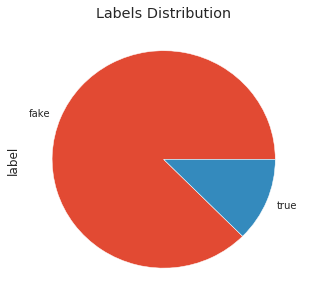



Classes:  ['fake' 'true']

Number of One Hot encoded class labels:  2


In [17]:
# Encode labels into categorical values

train = news_df.news
label = news_df.label

# Plot of label types numbers
pd.Series(label).value_counts().plot(
    kind='pie', title='Labels Distribution', figsize=(5, 5))
plt.show()

# Encode labels and create classes
le = LabelEncoder()
le.fit(label)
label_encoded = le.transform(label)
print("\n\nClasses: ", le.classes_)

# Convert labels into categorical values
label_onehot = to_categorical(label_encoded)
print("\nNumber of One Hot encoded class labels: ", label_onehot.shape[1])

## 2.4 Prepare Train, Valid & Test set

In [18]:
%time

SEED = 21

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    train, label_encoded, test_size=.4, stratify=label_encoded, random_state=SEED)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=SEED)

CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 23.8 µs


In [19]:
# Quantifying the positive & negative sentiments in the dataset

from collections import Counter

counter = Counter(y_train)
print('Train set entries.')
for key in counter:
    if key == 0:
        print('{:.2f}% Fake Entries'.format((counter[key]/len(y_train))*100))
    elif key == 1:
        print('{:.2f}% True Entries'.format((counter[key]/len(y_train))*100))

counter = Counter(y_val)
print('\nValidation set entries.')
for key in counter:
    if key == 0:
        print('{:.2f}% Fake Entries'.format((counter[key]/len(y_val))*100))
    elif key == 1:
        print('{:.2f}% True Entries'.format((counter[key]/len(y_val))*100))

counter = Counter(y_test)
print('\nTest set entries.')
for key in counter:
    if key == 0:
        print('{:.2f}% Fake Entries'.format((counter[key]/len(y_test))*100))
    elif key == 1:
        print('{:.2f}% True Entries'.format((counter[key]/len(y_test))*100))

Train set entries.
87.50% Fake Entries
12.50% True Entries

Validation set entries.
87.50% Fake Entries
12.50% True Entries

Test set entries.
87.50% Fake Entries
12.50% True Entries


# 3. Data Visualization

Let's find out the number of `words count` for `each article` and visualize the corresponding distribution.

## 3.1 Words Count 

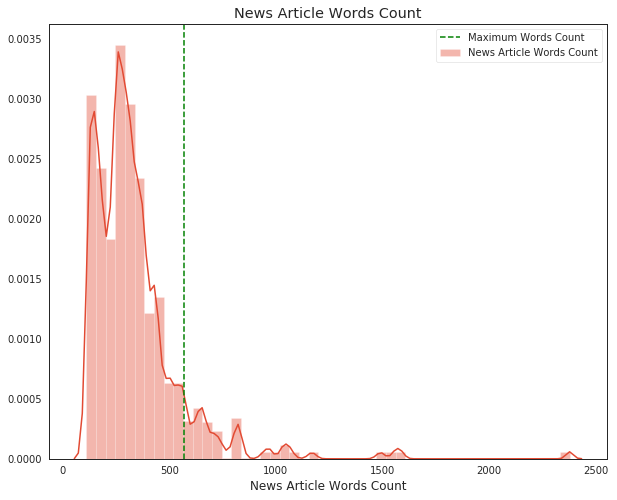

In [23]:
# Visualize words count distribution

news_df['news_len'] = news_df['news'].apply(
    lambda words: len(words.split(" ")))

# Maximum words count in an article, Calculated after averaging & adding standard deviation
max_word_count = np.round(
    news_df['news_len'].mean() + news_df['news_len'].std()).astype(int)

plt.figure(figsize=(10, 8))

sns.distplot(news_df['news_len'], hist=True, kde=True,
             label='News Article Words Count')

plt.axvline(x=max_word_count, color='green',
            linestyle='--', label='Maximum Words Count')
plt.title('News Article Words Count')
plt.xlabel('News Article Words Count')
plt.legend()
plt.show()

## 3.2 Word Cloud Visualization

A word cloud is a novelty `visual representation` of `text data`, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. 

Tags are usually single words, and the importance of each tag is shown with font size or color. This format is useful for quickly perceiving the most prominent terms and for locating a term alphabetically to determine its relative prominence.

We will visualize clouds depicting important keywords/tags for Fake & True news separately.

### True News Cloud

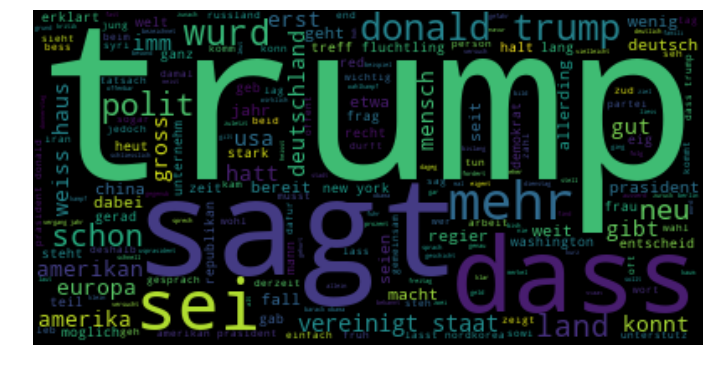

In [24]:
# Wordcloud beautification for True news

true_word_tokens = pd.Series(
    news_df[news_df['label'] == 'true'].news.tolist()).str.cat(sep=' ')

wordcloud = WordCloud(max_font_size=200, stopwords=stopwords.words(
    'german'), random_state=None, background_color='black').generate(true_word_tokens)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Fake News Cloud

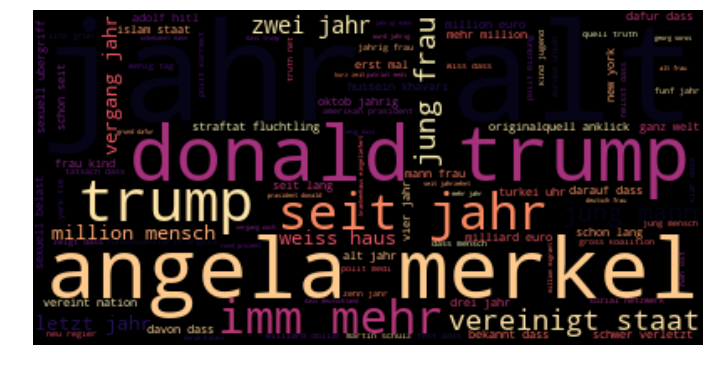

In [25]:
# Wordcloud beautification for Fake news

fake_word_tokens = pd.Series(
    news_df[news_df['label'] == 'fake'].news.tolist()).str.cat(sep=' ')

wordcloud = WordCloud(max_font_size=200, stopwords=stopwords.words(
    'german'), random_state=None, background_color='black', colormap='magma').generate(fake_word_tokens)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3.3 Chi2 Square

Let's extract `important features` using `Chi2` Square statistics and visualize the most important ones. The important features would further aid during the process of feature engineering.

### Fit & Transform data using Tfidf Vectorizer

In [30]:
# TfidfVectorizer Maximum nuber of features

max_features = 3000

# tf-idf vectorizer for sentence/topic/document modelling

tvec = TfidfVectorizer(max_features=max_features, ngram_range=(1, 3), max_df=0.65,
                       tokenizer=nltk.word_tokenize,
                       strip_accents='unicode',
                       lowercase=True, analyzer='word',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('german'))


# Fit & Transform on train texts
# Only transform on val & test texts

x_train_tf = tvec.fit_transform(x_train).toarray()
x_val_tf = tvec.transform(x_val).toarray()
x_test_tf = tvec.transform(x_test).toarray()

### Fit Chi2

In [31]:
# Fitting Chi2

chi2score = chi2(x_train_tf, y_train)[0]

print('chi2score.size: ', chi2score.size)

print('\nDumping chi2score ...')
joblib.dump(chi2score, os.path.join('./save/pickle', 'chi2score.pickle'))

chi2score.size:  3000

Dumping chi2score ...


['./save/pickle/chi2score.pickle']

### Plot Important Chi2 features

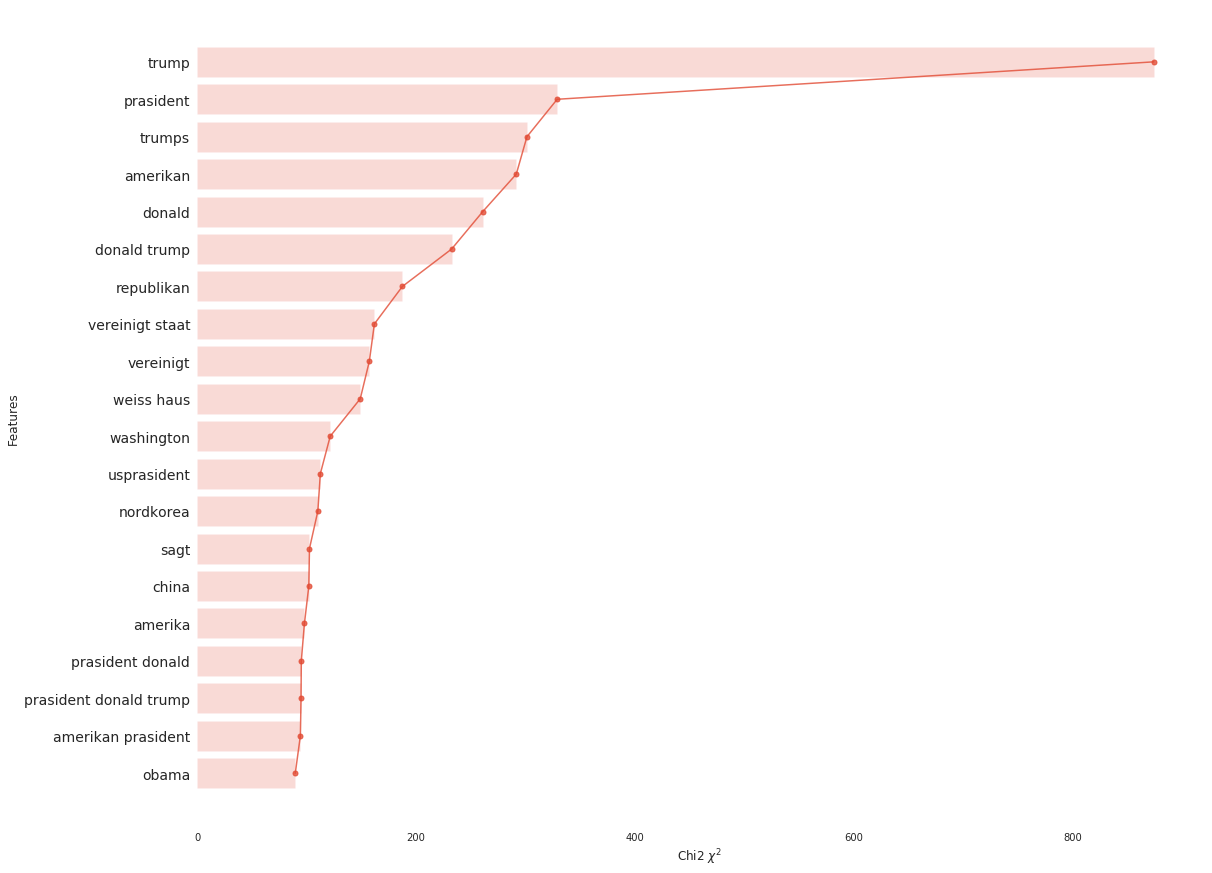

In [32]:
# Plot Important chi2square features after reducing dimesions

ax = plt.figure(figsize=(18, 15))

# Zip features names alongwith their scores & sort by chi2 score
features_chi2scores = zip(tvec.get_feature_names(), chi2score)
features_chi2scores_sorted = sorted(features_chi2scores, key=lambda x: x[1])

# Top 20 Chi2 features
topchi2 = list(zip(*features_chi2scores_sorted[-20:]))

# Feature name & total length of the features to plot a horizontal barplot
feature_names = topchi2[0]
feature_score = topchi2[1]
features_len = range(len(feature_score))

plt.barh(features_len, feature_score, align='center', alpha=0.2)
plt.plot(feature_score, features_len, '-o', markersize=5, alpha=0.8)

plt.yticks(features_len, feature_names, fontsize=14)

plt.xlabel('Chi2 $\chi^2$')
plt.ylabel('Features')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

### Logistic Regression Classical model to find best k features

After visualizing important features, let's run a basic Logistic Regression classical model with `varying number of features` to find out `best k features` using Sklearn `SelectKBest` method.

In [34]:
# Dimension reduction & testing on valdiation set

ch2_result = []

for features in np.arange(50, max_features, 100):

    # Select best features
    ch2 = SelectKBest(chi2, k=features)

    x_train_chi2_selected = ch2.fit_transform(x_train_tf, y_train)
    x_val_chi2_selected = ch2.transform(x_val_tf)

    # Fitting Logistic Regression classical model
    clf = LogisticRegression()
    clf.fit(x_train_chi2_selected, y_train)

    # Testing on the validation set
    score = clf.score(x_val_chi2_selected, y_val)

    print('Evaluation done for {} features using Chi2 feature selection method.'.format(features))

    print('Validation Score: ', np.round(score*100, 2))
    ch2_result.append(score)

Evaluation done for 50 features using Chi2 feature selection method.
Validation Score:  87.62
Evaluation done for 150 features using Chi2 feature selection method.
Validation Score:  87.53
Evaluation done for 250 features using Chi2 feature selection method.
Validation Score:  87.47
Evaluation done for 350 features using Chi2 feature selection method.
Validation Score:  87.47
Evaluation done for 450 features using Chi2 feature selection method.
Validation Score:  87.5
Evaluation done for 550 features using Chi2 feature selection method.
Validation Score:  87.48
Evaluation done for 650 features using Chi2 feature selection method.
Validation Score:  87.19
Evaluation done for 750 features using Chi2 feature selection method.
Validation Score:  87.12
Evaluation done for 850 features using Chi2 feature selection method.
Validation Score:  86.94
Evaluation done for 950 features using Chi2 feature selection method.
Validation Score:  86.93
Evaluation done for 1050 features using Chi2 feature

### Plot Accuracy vs K best features

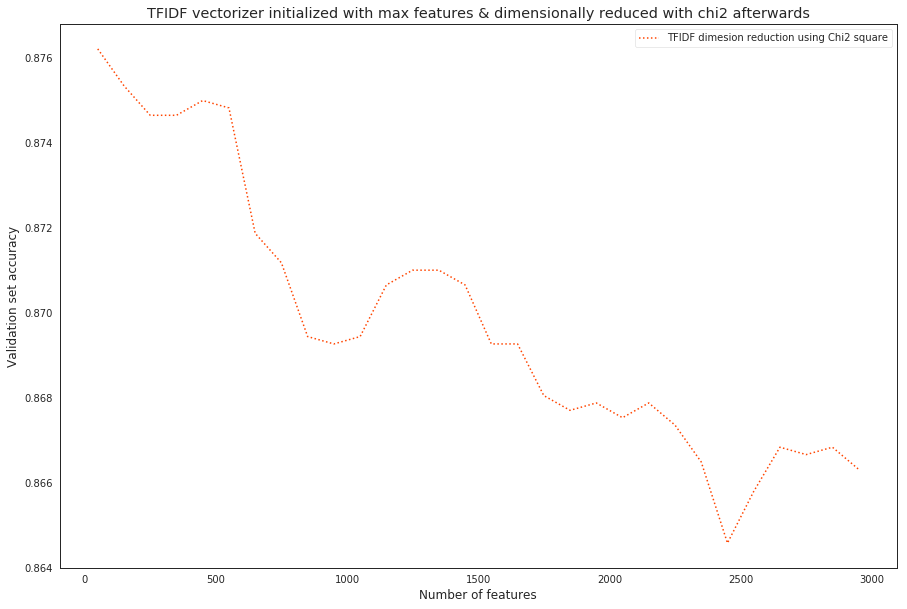

In [36]:
# Plot Important chi2square features after reducing dimesions

plt.figure(figsize=(15, 10))

plt.plot(np.arange(50, max_features, 100), ch2_result,
         label='TFIDF dimesion reduction using Chi2 square', linestyle=':', color='orangered')

plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.title("TFIDF vectorizer initialized with max features & dimensionally reduced with chi2 afterwards")
plt.legend()

### 3.4 PCA Visualization

Let's visualize data using `Principal Components Analysis` and reduce texts (TF-IDF vectors) into the lower dimensions to explain variance of different components.

In [37]:
# Scale using Standard Scaler

scaler = StandardScaler()
x_train_tf_scaled = scaler.fit_transform(x_train_tf)

In [38]:
# PCA Decomposition

pca = PCA().fit(x_train_tf_scaled)

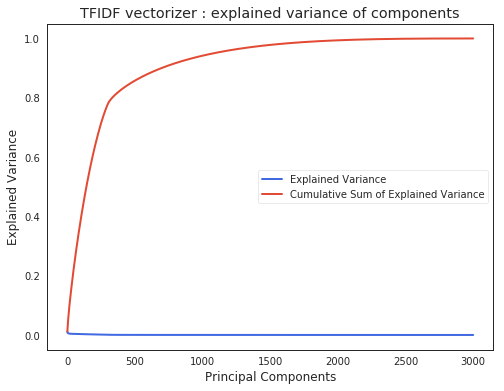

In [39]:
# Plot PCA on 2D

fig, ax = plt.subplots(figsize=(8, 6))

pca_components = range(1, pca.n_components_+1)
# pca_components = range(1, len(pca.explained_variance_ratio_)+1)

ax.plot(pca_components, pca.explained_variance_ratio_,
        lw=2, color='royalblue', label='Explained Variance')
ax.plot(pca_components, np.cumsum(pca.explained_variance_ratio_),
        lw=2, label='Cumulative Sum of Explained Variance')

# ax.set_xlim(-1, 300)
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
ax.set_title('TFIDF vectorizer : explained variance of components')

plt.legend()
plt.show()

In the above graph, the `red line` represents the `cumulative sum of explained variance` and the `blue line` represents the `explained variance of each principal component`.

By looking at the graph above, the cumulative variance varies faster till 300 features and then becomes flat.

It means that first 300 features explain the most variations (Principal Components) in a population of the dataset and thereafter the principal components contributes to the variance explanation almost equally and there's no point in reducing the dimensions after first 300. This can also be seen from the blue line, which is very close to a straight line in the bottom.

## 3.5 t-SNE 

### Helper Function

In [25]:
# Plot German FastText embeddings with t-SNE


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):

    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"

    plt.figure(figsize=(18, 18))  # in inches

    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label, fontsize=10, xy=(x, y), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

    plt.savefig(os.path.join('./save', filename))
    plt.show()

### FastText German Embeddings Visualization

Now we will visualize embeddings for 100 words in the FastText German vocabulary. 

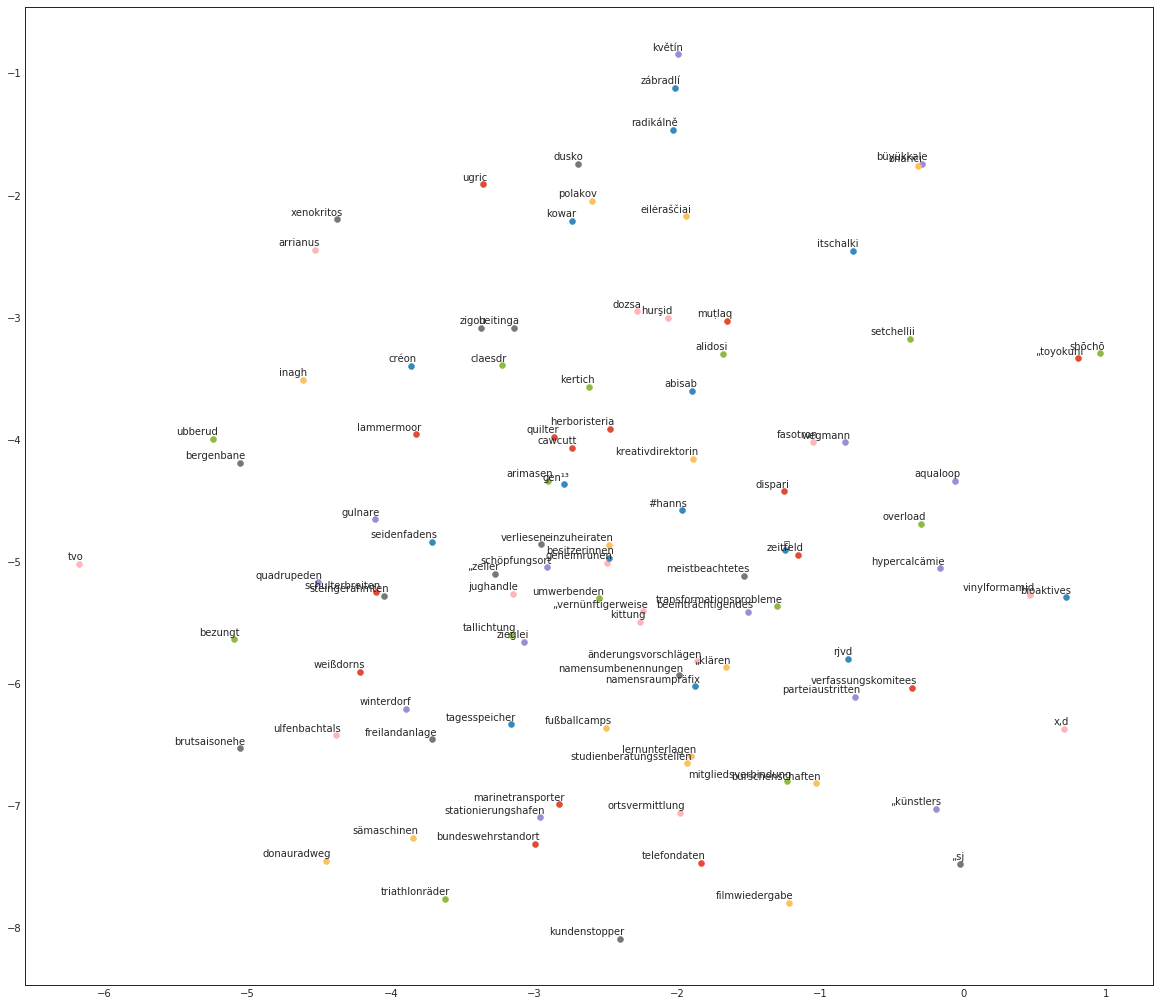

In [29]:
# Limit number of tokens to be visualized

limit = 100
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in de_model.vocab:
    # Break the loop if limit exceeds
    if i == limit:
        break

    # Getting token
    words.append(word)

    # Appending the vectors
    embedding = np.append(embedding, de_model[word])

    i += 1

# Reshaping the embedding vector
embedding = embedding.reshape(limit, vector_dim)

# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig
plot_with_labels(low_dim_embedding, words)

# 4. Feature Engineering

Now we need to identify important features for our task and prune the vocabulary based on it. The optimal vocabulary length depends upon the requirements and/or goals. It also helps in reducing space, time complexity & resource utilization.

## 4.1 Basic Feature Extraction using Count Vectorizer

### Fit & Transform using Count Vectorizer

In [88]:
# Count vectorizer

cvec = CountVectorizer(stop_words=stopwords.words(
    'german'), ngram_range=(1, 3))
cvec.fit(news_df.news)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die...wird', 'wirst', 'wo', 'wollen', 'wollte', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [89]:
cvec_features = cvec.get_feature_names()
len(cvec_features)

1413076

In [90]:
# Calculating positive, negative matrices and summing along rows

fake_matrix = cvec.transform(news_df[news_df['label'] == 'fake'].news)
true_matrix = cvec.transform(news_df[news_df['label'] == 'true'].news)

# Summing tf-idf values
fake_tf = np.sum(fake_matrix, axis=0)
true_tf = np.sum(true_matrix, axis=0)

# Remove single-dimensional entries from the shape of an array.
fake_tf_sq = np.squeeze(np.asarray(fake_tf))
true_tf_sq = np.squeeze(np.asarray(true_tf))

# tf-idf values saved in the dataframe
news_tfidf = pd.DataFrame([fake_tf_sq, true_tf_sq],
                          columns=cvec.get_feature_names()).transpose()
news_tfidf.to_hdf('./data/news_tfidf.hdf', 'News-TFIDF')

In [91]:
display(news_tfidf.head())

,0,1
000,1313,700
000 000,4,5
000 000 asylsuch,0,1
000 000 grenzubertritt,1,1
000 000 mensch,2,1


In [92]:
# Sorting positive, negative sentiments

news_tfidf.columns = ['fake', 'true']
news_tfidf['total'] = news_tfidf['fake'] + news_tfidf['true']

news_tfidf.to_csv('./data/news_tfidf.csv', encoding='utf-8')
news_tfidf.sort_values(by='total', ascending=False).iloc[:10]

,fake,true,total
dass,50328,9063,59391
wurd,27847,2675,30522
jahr,24050,3544,27594
mehr,23150,3752,26902
trump,11345,10747,22092
deutsch,20544,1269,21813
deutschland,18369,1335,19704
sei,15585,3197,18782
seit,15041,2572,17613
land,14084,2531,16615


### Plot top 50 keywords

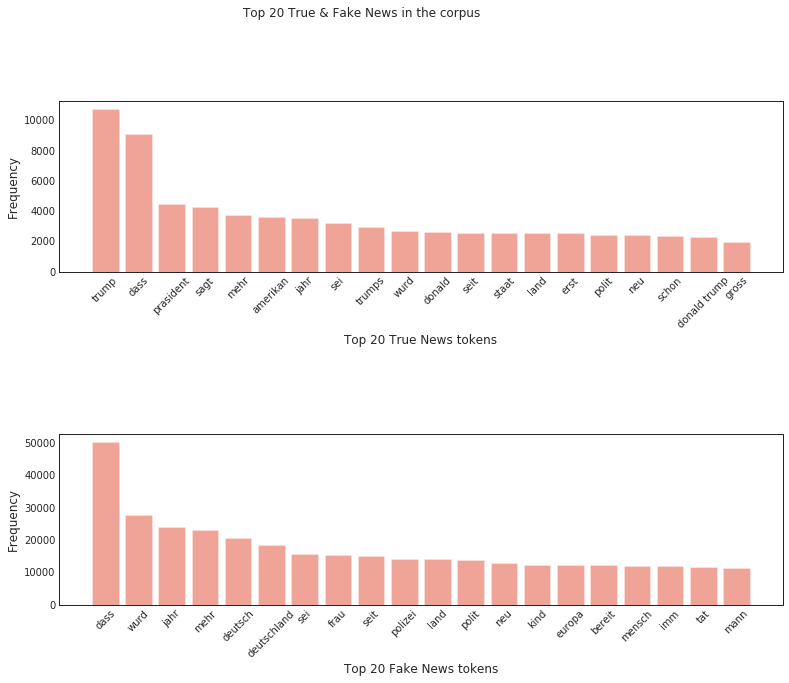

In [93]:
# Top 50 words

twenty_words = np.arange(20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Top 20 True & Fake News in the corpus')

ax1.bar(twenty_words, news_tfidf.sort_values(by='true', ascending=False)[
        'true'][:20], align='center', alpha=0.5)
ax1.set_xlabel('Top 20 True News tokens')
ax1.set_ylabel('Frequency')
ax1.set_xticks(twenty_words)
ax1.set_xticklabels(news_tfidf.sort_values(by='true', ascending=False)[
                    'true'][:20].index, rotation=45)

ax2.bar(twenty_words, news_tfidf.sort_values(by='fake', ascending=False)[
        'fake'][:20], align='center', alpha=0.5)
ax2.set_xlabel('Top 20 Fake News tokens')
ax2.set_ylabel('Frequency')
ax2.set_xticks(twenty_words)
ax2.set_xticklabels(news_tfidf.sort_values(by='fake', ascending=False)[
                    'fake'][:20].index, rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.15, wspace=0.15, hspace=.95)
plt.show()

### Plot Fake & True News keyword frequency 

Text(0.5,1,'Fake vs True News tokens Frequency')

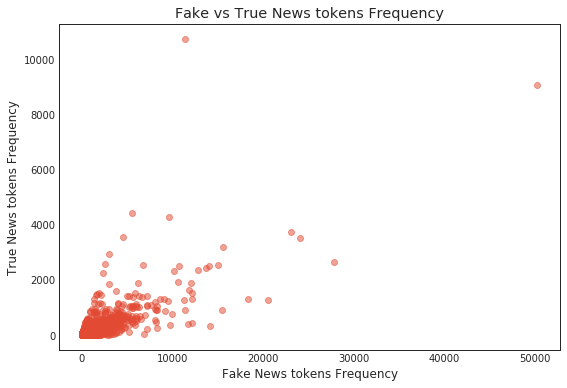

In [94]:
# Plot Fake & True News keyword frequency on X-axis, Y-axis respectively

plt.figure(figsize=(8, 6))
ax = sns.regplot(x="fake", y="true", fit_reg=False,
                 scatter_kws={'alpha': 0.5}, data=news_tfidf)

plt.xlabel('Fake News tokens Frequency')
plt.ylabel('True News tokens Frequency')

plt.title('Fake vs True News tokens Frequency')

Most of the words are below 10,000 on both X-axis & Y-axis and we cann't see a meaningful relation between negative and positive frequency.

The metrics from Scattertext is a good way to visualise text data and filter out meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise that class.

## 4.2 Advanced Feature Extraction using Count Vectorizer

Let's check whether top 10 TF-IDF terms are in the German stopwords corpus or not.

In [95]:
# Top 10 words in tf-idf
my_stop_words = frozenset(list(news_tfidf.sort_values(
    by='total', ascending=False).iloc[:10].index))

# Check top 10 words in tf-idf are present in english stop words
set(my_stop_words).issubset(set(stopwords.words('german')))

False

### Helper Functions

In [42]:
# Defining adjusted_classes function & plotting precision_recall curve with a given threshold


def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """

    return [1 if y >= t else 0 for y in y_scores]


def precision_recall_threshold(precision, recall, thresholds, y_test, y_scores, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """

    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.

    print('\n Plotting precision_recall curve against a given threshold of {}'.format(t))
    y_pred_adj = adjusted_classes(y_scores, t)
    print('\n\nAdjusted Threshold Confusion Matrix\n\n', pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                                                                      columns=[
                                                                          'pred_neg', 'pred_pos'],
                                                                      index=['neg', 'pos']), '\n\n')

    print('\n\nAdjusted Threshold F1 Score: ',
          f1_score(y_test, y_pred_adj, average=None))

    # plot the curve
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    # plt.ylim([0.5, 1.01]);
    # plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(recall[close_default_clf], precision[close_default_clf], '^', c='k',
             markersize=15)


# Plotting precision_recall vs decision threshold curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.figure(figsize=(8, 8))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.legend(loc='best')


# Plot an ROC-AUC curve

def plot_roc_curve(fpr, tpr, label=None):

    plt.figure(figsize=(8, 8))

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xticks(np.arange(0, 1, 0.25), rotation=45)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best')


# Plot the confusion matrix

def plot_confusion_matrix(cm,
                          target_names,
                          plt_name,
                          rootdir='./',
                          save_dir='save/',
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    plot_confusion_matrix function prints & plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    :param cm:confusion matrix from sklearn.metrics.confusion_matrix
    :param target_names:classification classes list eg. [0, 1] ['high', 'medium', 'low']
    :param rootdir:str
    :param save_dir:str
    :param plt_name:str
    :param title:str
    :param cmap:color map list
    :param normalize:bool
    :return:
    """

    plt_name += '_ConfusionMatrix'
    if normalize:
        plt_name = '{}_Normalized'.format(plt_name)

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f}; Misclassified={:0.4f}'.format(
        accuracy, misclass))

    print('\n\nSaving Confusion Matrices in the {} directory'.format(
        rootdir + save_dir))
    plt.savefig(rootdir + save_dir + '/{}.png'.format(plt_name),
                dpi=200, format='png', bbox_inches='tight')

    plt.show()
    plt.close()

In [40]:
# Calculates different metrics & summmary of different set of features


def metrics_fusion(pipeline, x_train, y_train, x_test, y_test, model_trained=False, stats=False, precision_recall_stats=False, new_threshold=0.5):

    # Timer starts
    timer = datetime.now()

    if not model_trained:
        pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)
    y_pred = np.array([int(np.round(value)) for value in y_pred])

    # Store the predictions probability
    # predictions_prob = pipeline.predict_proba(x_test)[:,1]

    elapsed_time = datetime.now() - timer
    # Timer stops

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    print('\nAccuracy score: {:.2f}%'.format(accuracy*100))
    print('Overall Train and Prediction time: {:.2f}s'.format(
        elapsed_time.total_seconds()))
    print('-'*89)

    # Confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    print('\n\nConfusion matrix of the Fake News test set\n\n')
    display(pd.DataFrame(con_matrix, columns=list(
        le.classes_), index=list(le.classes_)))

    classi_report = []
    if stats:
        # Plot the confusion matrix
        plot_confusion_matrix(con_matrix,
                              target_names=list(le.classes_),
                              plt_name='FakeNews_FastText_Matrix',
                              rootdir='./',
                              save_dir='save/con_matrix',
                              title='Confusion matrix',
                              cmap=plt.cm.Blues,
                              normalize=False)

        classi_report = classification_report(
            y_test, y_pred, target_names=list(le.classes_))
        print('\nClassification Report\n\n{}'.format(classi_report))

    if precision_recall_stats:
        # Generate the precision-recall curve for the classifier
        precision, recall, thresholds = precision_recall_curve(
            y_test, predictions_prob)

        # Plotting precision_recall vs decision threshold curve
        plot_precision_recall_vs_threshold(precision, recall, thresholds)

        # Plot precision_recall curve with a given threshold
        precision_recall_threshold(
            precision, recall, thresholds, y_test, predictions_prob, t=new_threshold)

        # Calculate False Positive rate, True Positive Rate, AUC Thresholds
        fpr, tpr, auc_thresholds = roc_curve(y_test, predictions_prob)

        # Plot ROC-AUC curve
        plot_roc_curve(fpr, tpr, 'Area Under Curve: {}'.format(auc(fpr, tpr)))

    return accuracy, elapsed_time, con_matrix, classi_report

In [137]:
# Feature extraction, Iteratively

# Count Vectorizer, Logistic Regression model
cvec = CountVectorizer()
lr = LogisticRegression()

n_features = np.arange(10000, 80000, 10000)


def feature_extraction(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr, stats=False):
    result = []
    print(classifier)

    for features in n_features:
        # Setting vectorizer parameters & creating pipeline
        cvec.set_params(stop_words=stop_words,
                        max_features=features, ngram_range=ngram_range)
        pipeline = Pipeline([
            ('vectorizer', cvec),
            ('classifier', classifier)
        ])
        print("\nValidation result for {} features".format(features))

        # Calculate accuracy & summmary
        features_accuracy, features_time, _, _ = metrics_fusion(
            pipeline, x_train, y_train, x_val, y_val, stats=stats)
        result.append((features, features_accuracy, features_time))

    return result

### 4.2.1 Feature Extractions using Trigram

#### Without German STOP words

In [105]:
% % time

print('Result for Trigram Without German STOP words\n')
feature_trigram_nostop = feature_extraction(ngram_range=(1, 3), stats=False)

Result for Trigram Without German STOP words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validation result for 10000 features

Accuracy score: 84.55%

Model accuracy:84.55% - Baseline accuracy:50.00%: Increase of 34.55%
Overall Train and Prediction time: 15.98s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,251,109



Validation result for 20000 features

Accuracy score: 84.44%

Model accuracy:84.44% - Baseline accuracy:50.00%: Increase of 34.44%
Overall Train and Prediction time: 16.74s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2322,198
true,250,110



Validation result for 30000 features

Accuracy score: 84.51%

Model accuracy:84.51% - Baseline accuracy:50.00%: Increase of 34.51%
Overall Train and Prediction time: 17.79s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,251,109



Validation result for 40000 features

Accuracy score: 84.58%

Model accuracy:84.58% - Baseline accuracy:50.00%: Increase of 34.58%
Overall Train and Prediction time: 18.91s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,250,110



Validation result for 50000 features

Accuracy score: 84.48%

Model accuracy:84.48% - Baseline accuracy:50.00%: Increase of 34.48%
Overall Train and Prediction time: 18.68s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,252,108



Validation result for 60000 features

Accuracy score: 84.48%

Model accuracy:84.48% - Baseline accuracy:50.00%: Increase of 34.48%
Overall Train and Prediction time: 19.61s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2323,197
true,250,110



Validation result for 70000 features

Accuracy score: 84.48%

Model accuracy:84.48% - Baseline accuracy:50.00%: Increase of 34.48%
Overall Train and Prediction time: 18.56s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2322,198
true,249,111


CPU times: user 3min 57s, sys: 2.12 s, total: 4min
Wall time: 2min 6s


#### With German STOP words

In [106]:
% % time

print('Result for Trigram with German STOP words\n')
feature_trigram_stop = feature_extraction(ngram_range=(
    1, 3), stop_words=stopwords.words('german'), stats=False)

Result for Trigram with German STOP words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validation result for 10000 features

Accuracy score: 84.55%

Model accuracy:84.55% - Baseline accuracy:50.00%: Increase of 34.55%
Overall Train and Prediction time: 16.13s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2329,191
true,254,106



Validation result for 20000 features

Accuracy score: 84.38%

Model accuracy:84.38% - Baseline accuracy:50.00%: Increase of 34.38%
Overall Train and Prediction time: 16.00s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2329,191
true,259,101



Validation result for 30000 features

Accuracy score: 84.27%

Model accuracy:84.27% - Baseline accuracy:50.00%: Increase of 34.27%
Overall Train and Prediction time: 17.64s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2324,196
true,257,103



Validation result for 40000 features

Accuracy score: 84.41%

Model accuracy:84.41% - Baseline accuracy:50.00%: Increase of 34.41%
Overall Train and Prediction time: 16.57s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,254,106



Validation result for 50000 features

Accuracy score: 84.44%

Model accuracy:84.44% - Baseline accuracy:50.00%: Increase of 34.44%
Overall Train and Prediction time: 18.74s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2327,193
true,255,105



Validation result for 60000 features

Accuracy score: 84.44%

Model accuracy:84.44% - Baseline accuracy:50.00%: Increase of 34.44%
Overall Train and Prediction time: 18.04s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,254,106



Validation result for 70000 features

Accuracy score: 84.48%

Model accuracy:84.48% - Baseline accuracy:50.00%: Increase of 34.48%
Overall Train and Prediction time: 19.94s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2324,196
true,251,109


CPU times: user 3min 46s, sys: 1.98 s, total: 3min 48s
Wall time: 2min 3s


### 4.2.2 Plot Features Extracted using Trigram 

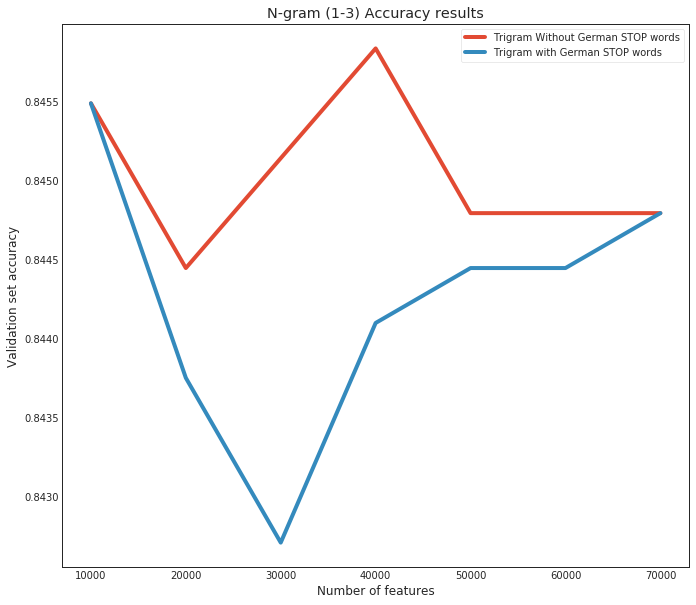

In [107]:
# Dataframes feature extraction results for without stop, with stop & custom stop words

feature_trigram_nostop_df = pd.DataFrame(feature_trigram_nostop, columns=[
                                         'features', 'features_accuracy', 'features_time'])
feature_trigram_stop_df = pd.DataFrame(feature_trigram_stop, columns=[
                                       'features', 'features_accuracy', 'features_time'])

# Plot the results
plt.figure(figsize=(10, 10))

plt.plot(feature_trigram_nostop_df.features, feature_trigram_nostop_df.features_accuracy,
         label='Trigram Without German STOP words')
plt.plot(feature_trigram_stop_df.features,
         feature_trigram_stop_df.features_accuracy, label='Trigram with German STOP words')

plt.title("N-gram (1-3) Accuracy results")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()

### 4.2.3 Train a Logistic Regression baseline model

Let's train a simple Logistic Regression on the important features extracted using Trigram, which will act as a baseline model.


Accuracy score: 84.55%

Model accuracy:84.55% increased from 50.00%
Overall Train and Prediction time: 18.03s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2329,191
true,254,106




Saving Confusion Matrices in the ./save/con_matrix directory


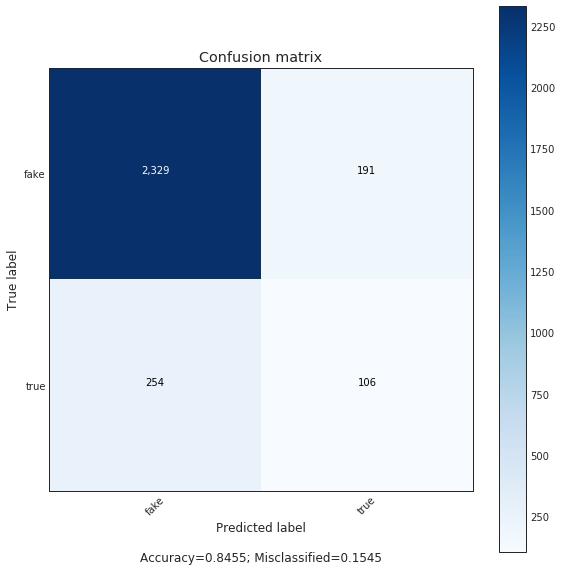


Classification Report

             precision    recall  f1-score   support

       fake       0.90      0.92      0.91      2520
       true       0.36      0.29      0.32       360

avg / total       0.83      0.85      0.84      2880


 Plotting precision_recall curve against a given threshold of 0.1


Adjusted Threshold Confusion Matrix

      pred_neg  pred_pos
neg      2259       261
pos       211       149 




Adjusted Threshold F1 Score:  [0.90541082 0.38701299]
CPU times: user 31.3 s, sys: 292 ms, total: 31.6 s
Wall time: 18.7 s


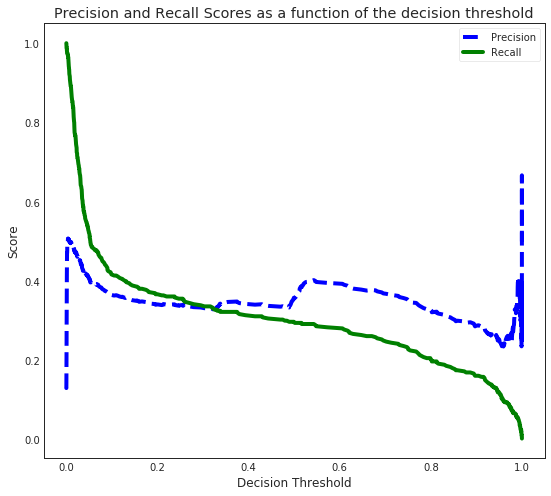

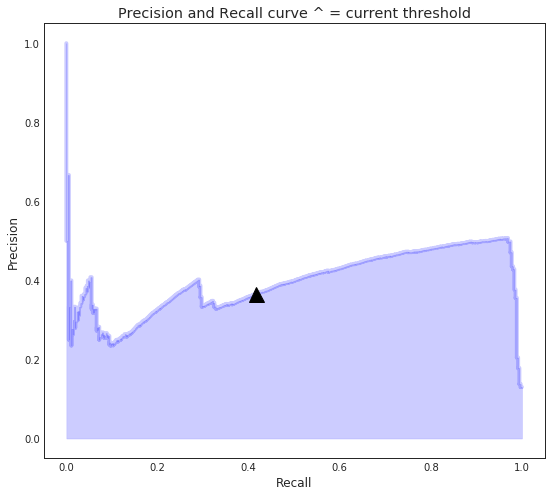

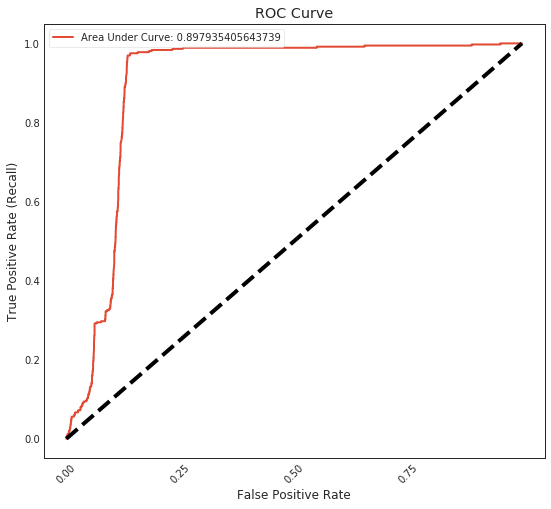

In [135]:
% % time

trigram_cvec = CountVectorizer(
    max_features=10000, stop_words=stopwords.words('german'), ngram_range=(1, 3))
lr = LogisticRegression()

trigram_pipeline = Pipeline([
    ('vectorizer', trigram_cvec),
    ('classifier', lr)
])

# Run trigram feature extraction with updated function
accuracy, elapsed_time, fusion_df, classi_report = metrics_fusion(
    trigram_pipeline, x_train, y_train, x_val, y_val, stats=True, precision_recall_stats=True, new_threshold=0.1)

## 4.3 Feature Extraction using TF-IDF Vectorizer

In [136]:
# Tfidf Vectorizer

tvec = TfidfVectorizer(ngram_range=(1, 3))

### 4.3.1 Feature Extractions using Trigram

#### Without German STOP words

In [138]:
% % time

print('Result for Trigram Without German STOP words using TF-IDF vectorizer\n')
feature_trigram_nostop_tf = feature_extraction(
    vectorizer=tvec, ngram_range=(1, 3), stats=False)

Result for Trigram Without German STOP words using TF-IDF vectorizer

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validation result for 10000 features

Accuracy score: 84.55%

Model accuracy:84.55% increased from 50.00%
Overall Train and Prediction time: 16.94s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,251,109



Validation result for 20000 features

Accuracy score: 84.44%

Model accuracy:84.44% increased from 50.00%
Overall Train and Prediction time: 17.78s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2322,198
true,250,110



Validation result for 30000 features

Accuracy score: 84.51%

Model accuracy:84.51% increased from 50.00%
Overall Train and Prediction time: 19.33s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,251,109



Validation result for 40000 features

Accuracy score: 84.58%

Model accuracy:84.58% increased from 50.00%
Overall Train and Prediction time: 21.41s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,250,110



Validation result for 50000 features

Accuracy score: 84.48%

Model accuracy:84.48% increased from 50.00%
Overall Train and Prediction time: 21.33s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,252,108



Validation result for 60000 features

Accuracy score: 84.48%

Model accuracy:84.48% increased from 50.00%
Overall Train and Prediction time: 21.87s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2323,197
true,250,110



Validation result for 70000 features

Accuracy score: 84.48%

Model accuracy:84.48% increased from 50.00%
Overall Train and Prediction time: 21.56s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2322,198
true,249,111


CPU times: user 4min 9s, sys: 2.21 s, total: 4min 11s
Wall time: 2min 20s


#### With German STOP words

In [139]:
% % time

print('Result for Trigram with German STOP words using TF-IDF vectorizer\n')
feature_trigram_stop_tf = feature_extraction(vectorizer=tvec, ngram_range=(
    1, 3), stop_words=stopwords.words('german'), stats=False)

Result for Trigram with German STOP words using TF-IDF vectorizer

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validation result for 10000 features

Accuracy score: 84.55%

Model accuracy:84.55% increased from 50.00%
Overall Train and Prediction time: 17.42s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2329,191
true,254,106



Validation result for 20000 features

Accuracy score: 84.38%

Model accuracy:84.38% increased from 50.00%
Overall Train and Prediction time: 20.01s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2329,191
true,259,101



Validation result for 30000 features

Accuracy score: 84.27%

Model accuracy:84.27% increased from 50.00%
Overall Train and Prediction time: 19.30s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2324,196
true,257,103



Validation result for 40000 features

Accuracy score: 84.41%

Model accuracy:84.41% increased from 50.00%
Overall Train and Prediction time: 18.84s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2325,195
true,254,106



Validation result for 50000 features

Accuracy score: 84.44%

Model accuracy:84.44% increased from 50.00%
Overall Train and Prediction time: 21.50s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2327,193
true,255,105



Validation result for 60000 features

Accuracy score: 84.44%

Model accuracy:84.44% increased from 50.00%
Overall Train and Prediction time: 20.59s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2326,194
true,254,106



Validation result for 70000 features

Accuracy score: 84.48%

Model accuracy:84.48% increased from 50.00%
Overall Train and Prediction time: 22.30s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2324,196
true,251,109


CPU times: user 4min 7s, sys: 2.21 s, total: 4min 9s
Wall time: 2min 20s


### 4.3.2 Plot Features Extracted using Trigram & TF-IDF vectorizer

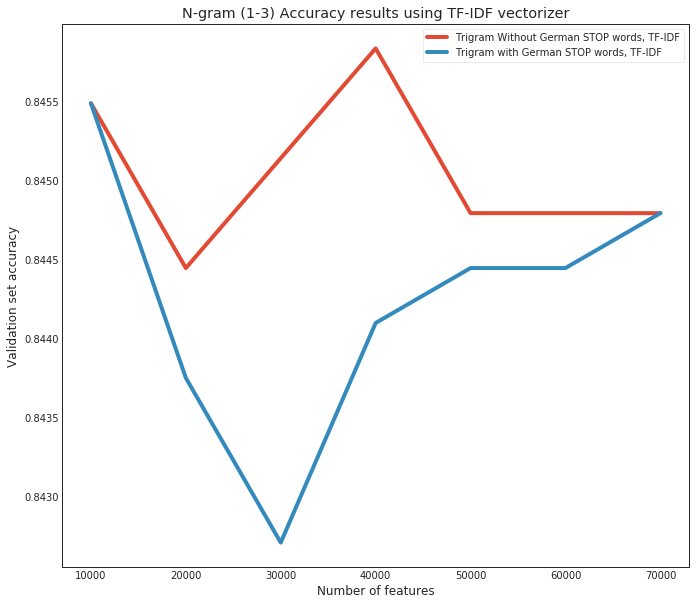

In [143]:
# Dataframes feature extraction results for without stop, with stop & custom stop words

feature_trigram_nostop_tf_df = pd.DataFrame(feature_trigram_nostop_tf, columns=[
                                            'features', 'features_accuracy', 'features_time'])
feature_trigram_stop_tf_df = pd.DataFrame(feature_trigram_stop_tf, columns=[
                                          'features', 'features_accuracy', 'features_time'])

# Plot all results
plt.figure(figsize=(10, 10))

plt.plot(feature_trigram_nostop_tf_df.features, feature_trigram_nostop_tf_df.features_accuracy,
         label='Trigram Without German STOP words, TF-IDF')
plt.plot(feature_trigram_stop_tf_df.features, feature_trigram_stop_tf_df.features_accuracy,
         label='Trigram with German STOP words, TF-IDF')

plt.title("N-gram (1-3) Accuracy results using TF-IDF vectorizer")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()

### 4.3.3 Train a Logistic Regression baseline model

Let's train a simple Logistic Regression on the important features extracted using Trigram, which will act as a baseline model.


Accuracy score: 85.97%
Overall Train and Prediction time: 14.39s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,2389,131
true,273,87




Saving Confusion Matrices in the ./save/con_matrix directory


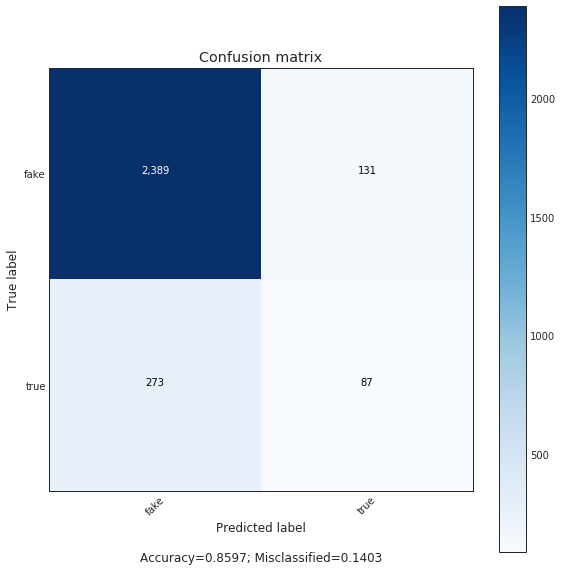


Classification Report

             precision    recall  f1-score   support

       fake       0.90      0.95      0.92      2520
       true       0.40      0.24      0.30       360

avg / total       0.84      0.86      0.84      2880


 Plotting precision_recall curve against a given threshold of 0.1


Adjusted Threshold Confusion Matrix

      pred_neg  pred_pos
neg      2179       341
pos         7       353 




Adjusted Threshold F1 Score:  [0.92605185 0.66982922]
CPU times: user 18.5 s, sys: 148 ms, total: 18.7 s
Wall time: 15.1 s


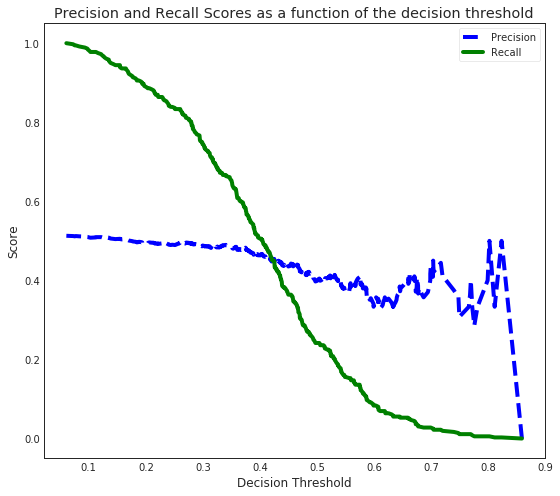

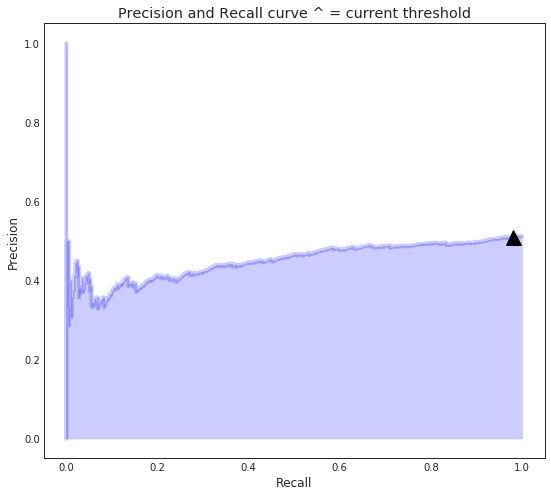

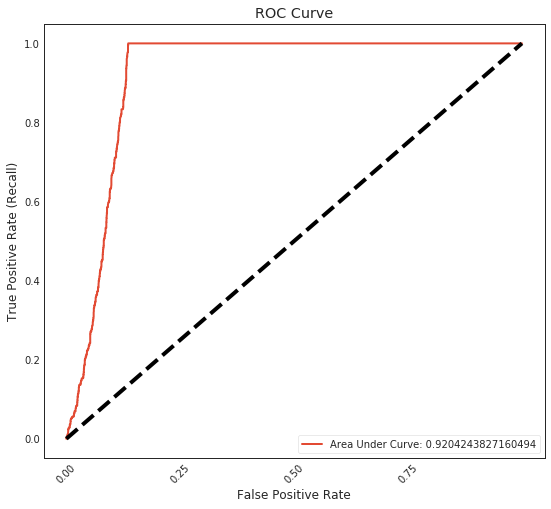

In [146]:
% % time

tvec = TfidfVectorizer(max_features=10000, stop_words=stopwords.words(
    'german'), ngram_range=(1, 3))
lr = LogisticRegression()

trigram_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])

# Run trigram feature extraction with updated function
accuracy, elapsed_time, fusion_df, classi_report = metrics_fusion(
    trigram_pipeline, x_train, y_train, x_val, y_val, stats=True, precision_recall_stats=True, new_threshold=0.1)

## 4.4 Plot Triagram Features Extracted using Count & TF-IDF vectorizer

Now we will compare the Triagram Features Extracted using Count & TF-IDF vectorizer against validation set accuracy.

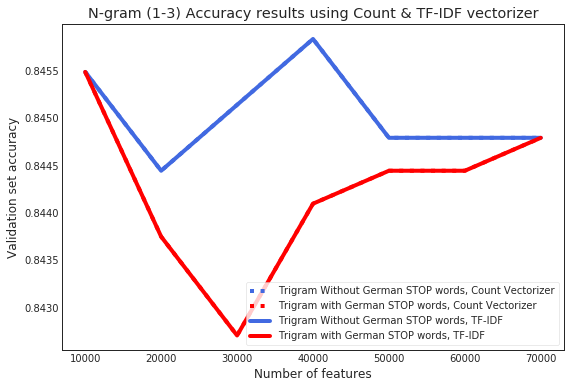

In [147]:
# Plot all results
plt.figure(figsize=(8, 6))

plt.plot(feature_trigram_nostop_df.features, feature_trigram_nostop_df.features_accuracy,
         linestyle=':', color='royalblue', label='Trigram Without German STOP words, Count Vectorizer')
plt.plot(feature_trigram_stop_df.features, feature_trigram_stop_df.features_accuracy,
         linestyle=':', color='red', label='Trigram with German STOP words, Count Vectorizer')

plt.plot(feature_trigram_nostop_tf_df.features, feature_trigram_nostop_tf_df.features_accuracy,
         color='royalblue', label='Trigram Without German STOP words, TF-IDF')
plt.plot(feature_trigram_stop_tf_df.features, feature_trigram_stop_tf_df.features_accuracy,
         color='red', label='Trigram with German STOP words, TF-IDF')

plt.title("N-gram (1-3) Accuracy results using Count & TF-IDF vectorizer")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()

# 5. Modelling

### Helper Functions

In [16]:
# Calculate metrices average


def metric_avg(metric_dict):

    # Dataframe containing classifier name & score
    metric_df = pd.DataFrame.from_dict(metric_dict, orient='index')

    #acc_df = acc_df.add_suffix('_Iteration')
    metric_df.columns = [
        str(col+1) + '_Iteration' for col in metric_df.columns]

    # Flatten scores
    metric_df = metric_df.applymap(lambda x: pd.Series(x).mean())

    # Calculate average score
    metric_df['avg'] = metric_df.mean(axis=1)

    metric_df = (metric_df*100).round(2)

    return metric_df

# Plot metrices average


def plot_metrics(sorted_acc_df, sorted_f1_df, sorted_auc_df):

    nb_rows, nb_cols = 1, 3
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(18, 12))

    # Plot metrices average

    for ax, (metric, df) in zip(axes, zip(['Accuracy AVG', 'F1 AVG', 'AUC AVG'], [sorted_acc_df, sorted_f1_df, sorted_auc_df])):

        # Plot a barplot containing classifier name & metrics i.e. accuracy, f1 score & auc
        ax = sns.barplot(x='avg', y=df.index, ax=ax, data=df)
        ax.set(xlabel=metric)
        ax.set_xlim(df['avg'].max()-10, df['avg'].max()+10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

    # Remove spines

    sns.despine()

In [17]:
# Cross_validation class definition


class cross_validation(object):
    '''This class provides cross validation of any data set why incrementally increasing number 
       of samples in the training and test set and performing KFold splits at every iteration. 
       During cross validation the metrics accuracy, recall, precision, and f1-score are recored. 
       The results of the cross validation are display on four learning curves. '''

    def __init__(self, model, X_data, Y_data, X_test=None, Y_test=None,
                 n_splits=3, init_chunk_size=1000000, chunk_spacings=100000, average="binary"):

        self.X, self.Y = shuffle(X_data, Y_data, random_state=21)

        self.model = model
        self.n_splits = n_splits
        self.chunk_size = init_chunk_size
        self.chunk_spacings = chunk_spacings

        self.X_train = []
        self.X_test = []
        self.Y_train = []
        self.Y_test = []
        self.X_holdout = []
        self.Y_holdout = []

        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

        self.f1_mean_train = []
        self.f1_mean_test = []
        self.acc_mean_train = []
        self.acc_mean_test = []
        self.pre_mean_train = []
        self.pre_mean_test = []
        self.rec_mean_train = []
        self.rec_mean_test = []

        self.training_size = []
        self.averageType = average

    def make_chunks(self):
        '''Partitions data into chunks for incremental cross validation'''

        # get total number of points
        self.N_total = self.X.shape[0]
        # partition data into chunks for learning
        self.chunks = list(
            np.arange(self.chunk_size, self.N_total, self.chunk_spacings))
        self.remainder = self.X.shape[0] - self.chunks[-1]
        self.chunks.append(self.chunks[-1] + self.remainder)

    def train_for_learning_curve(self):
        '''KFold cross validates model and records metric scores for learning curves. 
           Metrics scored are f1-score, precision, recall, and accuracy'''

        # partiton data into chunks
        self.make_chunks()
        # for each iteration, allow the model to use 10 more samples in the training set
        self.skf = StratifiedKFold(
            n_splits=self.n_splits, shuffle=True, random_state=1234)
        # iterate through the first n samples
        for n_points in self.chunks:

            # split the first n samples in k folds
            for train_index, test_index in self.skf.split(self.X[:n_points], self.Y[:n_points]):
                self.train_index, self.test_index = train_index, test_index
                self.X_train = self.X[self.train_index]
                self.X_test = self.X[self.test_index]
                self.Y_train = self.Y[self.train_index]
                self.Y_test = self.Y[self.test_index]

                self.model.fit(self.X_train, self.Y_train)
                self.y_pred_train = self.model.predict(self.X_train)
                self.y_pred_test = self.model.predict(self.X_test)
                self.log_metric_scores_()

            self.log_metric_score_means_()
            self.training_size.append(n_points)

    def validate_for_holdout_set(self, X_holdout, Y_holdout):

        self.X_test = X_holdout
        self.Y_test = Y_holdout

        # partiton data into chunks
        self.make_chunks()

        for n_points in self.chunks:

            self.X_train = self.X[:n_points]
            self.Y_train = self.Y[:n_points]

            self.model.fit(self.X_train, self.Y_train)
            self.y_pred_train = self.model.predict(self.X_train)
            self.y_pred_test = self.model.predict(self.X_test)
            self.log_metric_scores_()

            self.log_metric_score_means_()
            self.training_size.append(n_points)

    def log_metric_score_means_(self):
        '''Recrods the mean of the four metrics recording during training'''
        self.f1_mean_train.append(np.sum(self.f1_train)/len(self.f1_train))
        self.f1_mean_test.append(np.sum(self.f1_test)/len(self.f1_test))

        self.acc_mean_train.append(np.sum(self.acc_train)/len(self.acc_train))
        self.acc_mean_test.append(np.sum(self.acc_test)/len(self.acc_test))

        self.pre_mean_train.append(np.sum(self.pre_train)/len(self.pre_train))
        self.pre_mean_test.append(np.sum(self.pre_test)/len(self.pre_test))

        self.rec_mean_train.append(np.sum(self.rec_train)/len(self.rec_train))
        self.rec_mean_test.append(np.sum(self.rec_test)/len(self.rec_test))

        self.reinitialize_metric_lists_()

    def reinitialize_metric_lists_(self):
        '''Reinitializes metrics lists for training'''
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

    def log_metric_scores_(self):
        '''Records the metric scores during each training iteration'''
        self.f1_train.append(
            f1_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.acc_train.append(accuracy_score(self.Y_train, self.y_pred_train))

        self.pre_train.append(precision_score(
            self.Y_train, self.y_pred_train, average=self.averageType))
        self.rec_train.append(recall_score(
            self.Y_train, self.y_pred_train, average=self.averageType))

        self.f1_test.append(
            f1_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.acc_test.append(accuracy_score(self.Y_test, self.y_pred_test))

        self.pre_test.append(precision_score(
            self.Y_test, self.y_pred_test, average=self.averageType))
        self.rec_test.append(recall_score(
            self.Y_test, self.y_pred_test, average=self.averageType))

    def plot_learning_curve(self):
        '''Plots f1 and accuracy learning curves for a given model and data set'''

        fig = plt.figure(figsize=(17, 12))
        # plot f1 score learning curve
        fig.add_subplot(221)   # left
        plt.title("F1-Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.f1_mean_train, label="Train")
        plt.plot(self.training_size, self.f1_mean_test, label="Test")
        plt.xlabel("Number of Training Samples")
        plt.ylabel("F1-Score")
        plt.legend(loc=4)

        # plot accuracy learning curve
        fig.add_subplot(222)   # right
        plt.title("Accuracy vs. Number of Training Samples")
        plt.plot(self.training_size, self.acc_mean_train, label="Train")
        plt.plot(self.training_size, self.acc_mean_test, label="Test")
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Accuracy")
        plt.legend(loc=4)

        # plot precision learning curve
        fig.add_subplot(223)   # left
        plt.title("Precision Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.pre_mean_train, label="Train")
        plt.plot(self.training_size, self.pre_mean_test, label="Test")
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Precision")
        plt.ylim(min(self.pre_mean_test), max(self.pre_mean_train) + 0.05)
        plt.legend(loc=4)

        # plot accuracy learning curve
        fig.add_subplot(224)   # right
        plt.title("Recall vs. Number of Training Samples")
        plt.plot(self.training_size, self.rec_mean_train, label="Train")
        plt.plot(self.training_size, self.rec_mean_test, label="Test")
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Recall")
        plt.legend(loc=4)

## 5.1 Classifier Comparison

After fitting our train dataset on Logistic Regression, you can run a general Classifier Comparison module containing sklearn classifers with vanilla configurations.

In [156]:
# Classifier comparison module


def classifier_comparison(x_train, y_train, vectorizer, n_splits=3):
    # Classifier names & initializations
    names = ["Decision Tree", "Random Forest", "Nearest Neighbors", "SVM", "Neural Net",
             "AdaBoost", "GradientBoost", "Naive Bayes", "XGB Classifier"]

    classifiers = [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        KNeighborsClassifier(3),
        SVC(probability=True),
        MLPClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        MultinomialNB(),
        XGBClassifier()]

    # Split & shuffle data using Stratified K Fold
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21)

    # Calculate accuracy, f1 & auc over all splits, classifiers
    count = 0
    acc_dict = defaultdict(list)
    f1_dict = defaultdict(list)
    auc_dict = defaultdict(list)
    for train_index, test_index in kfold.split(x_train, y_train):
        xtrain, ytrain = x_train[train_index], y_train[train_index]
        xtest, ytest = x_train[test_index], y_train[test_index]
        print('Iteration: ', count)

        # iterate over classifiers
        for clf in classifiers:
            pipeline = Pipeline([
                ('vectorizer', vectorizer),
                ('classifier', clf)
            ])
            clf_name = clf.__class__.__name__
            print('Fitting ', clf_name)
            pipeline.fit(xtrain, ytrain)
            predictions = pipeline.predict(xtest)
            accuracy = accuracy_score(ytest, predictions)

            # Store the predictions probability
            predictions_prob = pipeline.predict_proba(xtest)[:, 1]

            # Calculate False Positive rate, True Positive Rate, AUC Thresholds
            fpr, tpr, auc_thresholds = roc_curve(ytest, predictions_prob)

            # Append results in default dict of lists
            acc_dict[clf_name].append(accuracy)
            f1_dict[clf_name].append(
                f1_score(ytest, predictions, average=None))
            auc_dict[clf_name].append(auc(fpr, tpr))

        count += 1

    return acc_dict, f1_dict, auc_dict

### 5.1.1 Training

In [157]:
% % time

tvec = TfidfVectorizer(max_features=10000, stop_words=stopwords.words(
    'german'), ngram_range=(1, 3))

# Call the classifier_comparison module & save the results
acc_dict, f1_dict, auc_dict = classifier_comparison(
    train, label_encoded, vectorizer=tvec, n_splits=3)

Iteration:  0
Fitting  DecisionTreeClassifier
Fitting  RandomForestClassifier
Fitting  KNeighborsClassifier
Fitting  SVC
Fitting  MLPClassifier
Fitting  AdaBoostClassifier
Fitting  GradientBoostingClassifier
Fitting  MultinomialNB
Fitting  XGBClassifier
Iteration:  1
Fitting  DecisionTreeClassifier
Fitting  RandomForestClassifier
Fitting  KNeighborsClassifier
Fitting  SVC
Fitting  MLPClassifier
Fitting  AdaBoostClassifier
Fitting  GradientBoostingClassifier
Fitting  MultinomialNB
Fitting  XGBClassifier
Iteration:  2
Fitting  DecisionTreeClassifier
Fitting  RandomForestClassifier
Fitting  KNeighborsClassifier
Fitting  SVC
Fitting  MLPClassifier
Fitting  AdaBoostClassifier
Fitting  GradientBoostingClassifier
Fitting  MultinomialNB
Fitting  XGBClassifier
CPU times: user 47min 25s, sys: 13.4 s, total: 47min 38s
Wall time: 34min 14s


### 5.1.2 Evaluation Metrices

#### Accuracy Metric

In [169]:
# Accuracy of different classifiers

acc_df = metric_avg(acc_dict)
sorted_acc_df = acc_df.sort_values(by='avg', ascending=False)
display(sorted_acc_df)

,1_Iteration,2_Iteration,3_Iteration,avg
SVC,87.50,87.50,87.50,87.50
AdaBoostClassifier,87.15,86.97,86.92,87.01
MultinomialNB,85.98,86.75,85.93,86.22
XGBClassifier,85.48,85.50,85.60,85.53
GradientBoostingClassifier,85.20,85.35,85.70,85.42
KNeighborsClassifier,84.52,85.03,85.20,84.92
DecisionTreeClassifier,84.65,84.83,84.67,84.72
MLPClassifier,84.78,84.23,85.13,84.72
RandomForestClassifier,84.18,84.47,84.27,84.31


#### F1 Metric

In [170]:
# F1 Score of different classifiers

f1_df = metric_avg(f1_dict)
sorted_f1_df = f1_df.sort_values(by='avg', ascending=False)
display(sorted_f1_df)

,1_Iteration,2_Iteration,3_Iteration,avg
MultinomialNB,75.57,76.31,75.71,75.87
AdaBoostClassifier,69.60,66.89,68.93,68.47
KNeighborsClassifier,65.53,66.10,67.21,66.28
XGBClassifier,64.18,61.21,64.04,63.14
MLPClassifier,61.68,62.63,62.48,62.26
RandomForestClassifier,61.75,61.41,60.96,61.37
GradientBoostingClassifier,61.22,59.03,62.84,61.03
DecisionTreeClassifier,58.43,58.78,56.57,57.93
SVC,46.67,46.67,46.67,46.67


#### AUC Metric

In [171]:
# Area under Curve (AUC) of different classifiers

auc_df = metric_avg(auc_dict)
sorted_auc_df = auc_df.sort_values(by='avg', ascending=False)
display(sorted_auc_df)

,1_Iteration,2_Iteration,3_Iteration,avg
MultinomialNB,91.71,92.42,91.95,92.03
AdaBoostClassifier,91.41,91.64,91.40,91.48
XGBClassifier,90.89,91.30,91.63,91.27
GradientBoostingClassifier,90.30,91.27,91.51,91.03
MLPClassifier,89.47,89.87,89.83,89.73
KNeighborsClassifier,86.64,85.51,86.20,86.12
RandomForestClassifier,85.62,85.76,86.67,86.02
SVC,86.39,82.92,85.54,84.95
DecisionTreeClassifier,65.20,63.11,63.68,64.00


### 5.1.3 Best Classifiers

Let's find out the `best classifiers` based on the plots of all `metrics` in the `sorted` order.

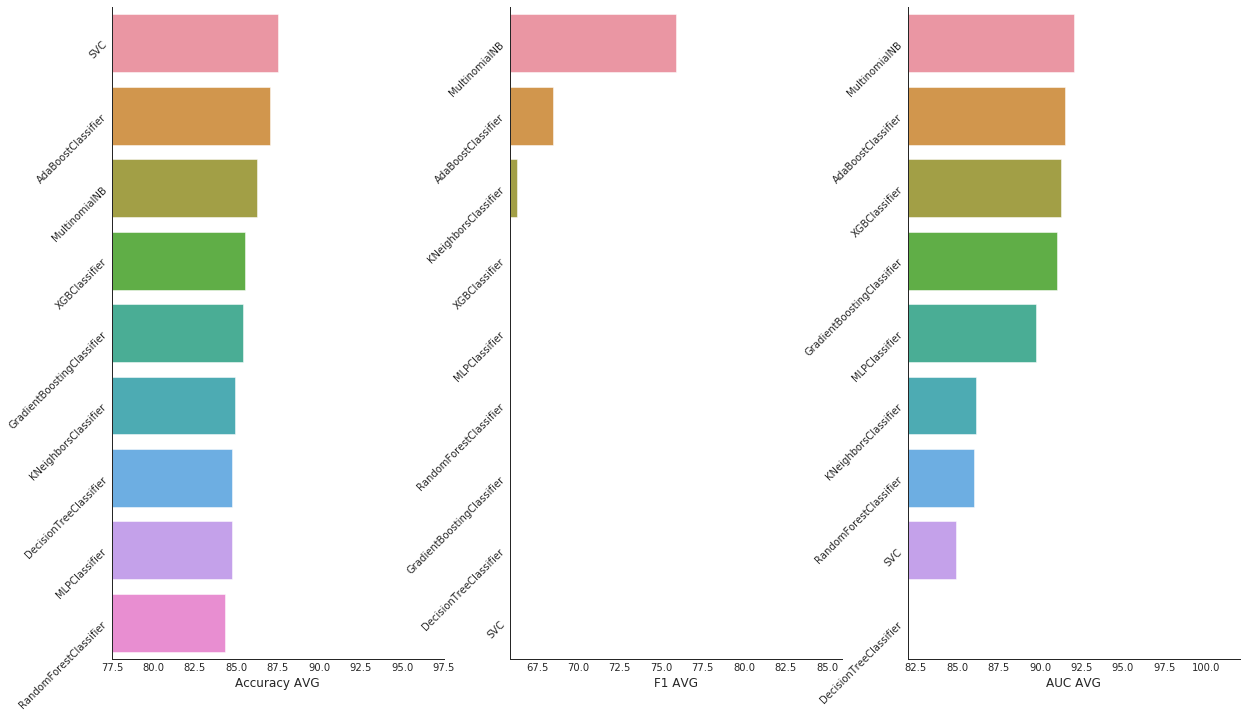

In [244]:
plot_metrics(sorted_acc_df, sorted_f1_df, sorted_auc_df)

The `best classifiers` are as follow.

1. `MultinomialNB`
2. `XGBClassifier`
3. `AdaBoostClassifier`

Now we can train above best models and `tune` different hyperparameters using `HyperOpt`.

## 5.2 Optimize & Evaluate Best Classifiers

### 5.2.1 Naive Bayes Classifier

#### Load Data

In [17]:
# TfidfVectorizer Maximum nuber of features

max_features = 3000

# tf-idf vectorizer for sentence/topic/document modelling

tvec = TfidfVectorizer(max_features=max_features, ngram_range=(1, 3), max_df=0.65,
                       tokenizer=nltk.word_tokenize,
                       strip_accents='unicode',
                       lowercase=True, analyzer='word',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('german'))

# Fit & Transform on train texts
# Only transform on val & test texts

train_X = tvec.fit_transform(x_train).toarray()
valid_X = tvec.transform(x_val).toarray()
test_X = tvec.transform(x_test).toarray()

train_y = y_train
valid_y = y_val
test_y = y_test

#### Append train & valid set data for Cross Validation

In [18]:
# Prepare training data

train_val_tf = np.append(train_X, valid_X, axis=0)
label_val_tf = np.append(train_y, valid_y, axis=0)

#### 5.2.1.1 Cross Validation

Now we will use `cross validation` method with 5 n_splits for averaging the scores and plot different `learning curves` against number of samples.

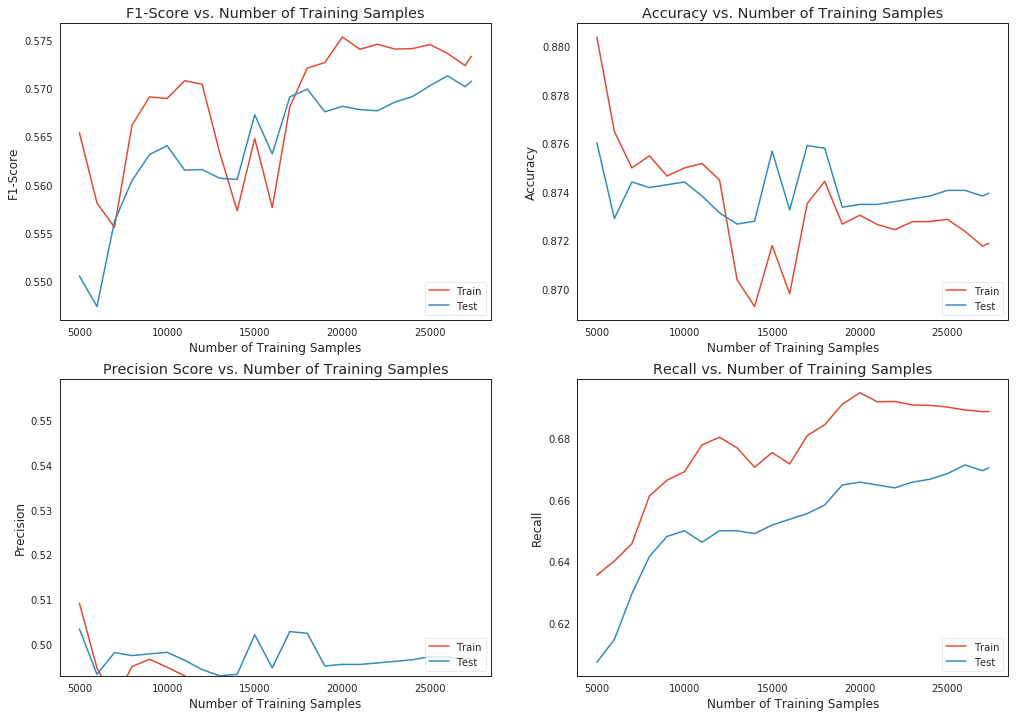

In [25]:
# Cross validation class instance initialization, validation using 5 splits on XGB classifier

cv = cross_validation(nb, train_val_tf, label_val_tf, n_splits=5,
                      init_chunk_size=5000, chunk_spacings=1000, average="binary")
cv.validate_for_holdout_set(test_X, y_test)

# Plot different scores
cv.plot_learning_curve()

#### 5.2.1.2 HyperOpt Optimization

Now we will find the `best alpha` parameter for `Naive Bayes`. Hence let's visualize the `universe` to be `explored` during HyperOpt optimization.

##### Space Visualization

In [29]:
# Parameter's space
hyper_space = {
    'alpha': hp.quniform('alpha',  0.05, 1, 0.05)
}

print('Sampling space example\n')
pprint.pprint(sample(hyper_space))

Sampling space example

{'alpha': 0.65}


##### Universe

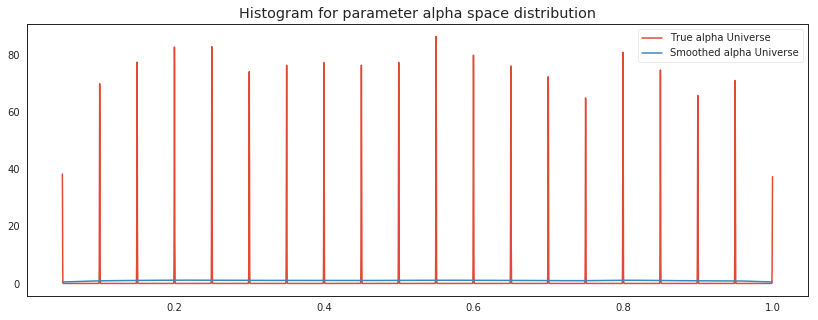

In [54]:
# Plot different parameter's space distribution after sampling for n_samples

n_samples = 5000
universe = {}

fig, axes = plt.subplots(nrows=len(hyper_space.keys()),
                         ncols=1, figsize=(14, 5))
cmap = plt.cm.jet

# Iterating over different trials & parameters
for param, param_space in hyper_space.items():

    # Sampling for n_samples
    universe[param] = [pyll.stochastic.sample(
        hyper_space[param]) for _ in range(n_samples)]
    param_domain = np.linspace(
        min(universe[param]), max(universe[param]), n_samples)

    # KDE calculation
    hist = gaussian_kde(universe[param], 0.001)
    axes.plot(param_domain, hist(param_domain),
              label='True {} Universe'.format(param))

    blurred_hist = gaussian_kde(universe[param], 0.1)
    axes.plot(param_domain, blurred_hist(param_domain),
              label='Smoothed {} Universe'.format(param))

    axes.set_title(
        'Histogram for parameter {} space distribution'.format(param))
    axes.legend(loc='best')

    del universe[param]

plt.show()

**Tree Parzen Estimator (algorithm = tpe.suggest)**

* AUC as an evaluation metric

In [65]:
iterations = 50
random_state = 21
cores = -1
best = 0

# Define the XGB  function as the objective


def objective(space):

    global best

    train_val_tf_ = train_val_tf
    test_X_ = test_X

    # Normalizing or scaling the data
    if 'normalize' in space:
        if space['normalize'] == 1:
            train_val_tf_ = normalize(train_val_tf_)
            test_X_ = normalize(test_X_)
            del space['normalize']

    if 'scale' in space:
        if space['scale'] == 1:
            train_val_tf_ = scale(train_val_tf_)
            test_X_ = scale(test_X_)
            del space['scale']

    nb = MultinomialNB(alpha=space['alpha'])

    nb.fit(train_val_tf, label_val_tf)

    # Predict & evaluate metrics
    y_pred = nb.predict(test_X)

    # print('\nNaive Bayes Scores\n')
    # print("F1 score {:.4}%".format( f1_score(y_test, y_pred, average='macro')*100 ) )
    # print('Accuracy score {:.4}%'.format(accuracy_score(y_test, y_pred)*100) )

    # evaluate predictions
    predictions_prob = nb.predict_proba(test_X)[:, 1]
    auc = roc_auc_score(y_test, predictions_prob)

    if auc > best:
        best = auc
        print('\nBest AUC score: {}'.format(np.round(best*100, 2)))
        print('Space Parameters')
        pprint.pprint(space)

    return {'loss': 1-auc, 'status': STATUS_OK}


# Parameter's space
space = {
    'alpha': hp.quniform('alpha',  0.05, 1, 0.01)
}


print('Sampling space example')
pprint.pprint(sample(space))

# Trials keeps track of all experiments; These can be saved and loaded back into a new batch of experiments
tpe_auc_trials = Trials()

# The algorithm tpe.suggest runs the Tree-structured Parzen estimator
best_tpe_auc = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=iterations,
                    trials=tpe_auc_trials)

print('\n\nThe best parameteres discovered through HyperOpt tpe.suggest algorithm using AUC as an evaluation metric\n\n', best_tpe_auc)

Sampling space example
{'alpha': 0.42}

Best AUC score: 91.49
Space Parameters
{'alpha': 0.6900000000000001}

Best AUC score: 91.53
Space Parameters
{'alpha': 0.17}

Best AUC score: 91.54
Space Parameters
{'alpha': 0.07}

Best AUC score: 91.54
Space Parameters
{'alpha': 0.05}


The best parameteres discovered through HyperOpt tpe.suggest algorithm using AUC as an evaluation metric

 {'alpha': 0.05}


#### Run the MultinomialNB classifier

Let's run a Naive Bayes classifier again with the `best alpha parameter value` of `alpha=0.5` found after HyperOpt optimization.

In [69]:
# Train a MultinomialNB classifier

nb = MultinomialNB(alpha=0.5)
nb.fit(train_val_tf, label_val_tf)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [70]:
# Predict & evaluate metrics

y_pred = nb.predict(test_X)

print('Naive Bayes Scores\n')
print("F1 score {:.4}%".format(f1_score(y_test, y_pred, average='macro')*100))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test, y_pred)*100))

Naive Bayes Scores

F1 score 74.89%
Accuracy score 87.4%


#### Evaluation

We can vary the threshold to select a different decision boundary to tune the model depending upon the goal. It's called Trade-Off between Precision & Recall.


Accuracy score: 87.40%
Overall Train and Prediction time: 0.08s
-----------------------------------------------------------------------------------------


Confusion matrix of the Fake News test set




,fake,true
fake,6824,736
true,353,727




Saving Confusion Matrices in the ./save/con_matrix directory


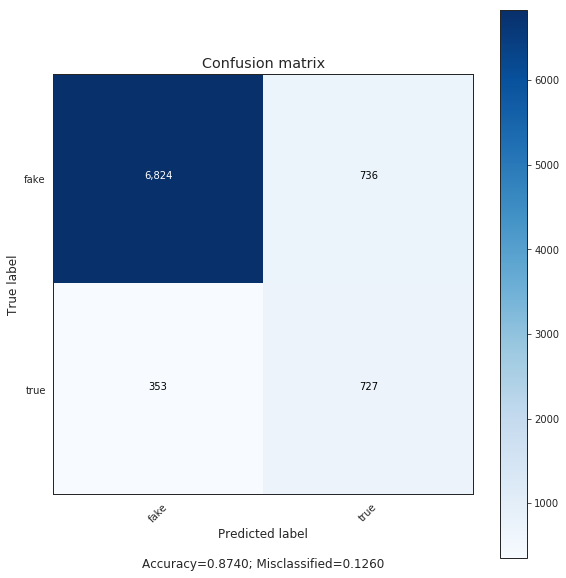


Classification Report

             precision    recall  f1-score   support

       fake       0.95      0.90      0.93      7560
       true       0.50      0.67      0.57      1080

avg / total       0.89      0.87      0.88      8640


 Plotting precision_recall curve against a given threshold of 0.6


Adjusted Threshold Confusion Matrix

      pred_neg  pred_pos
neg      6903       657
pos       412       668 




Adjusted Threshold F1 Score:  [0.92813445 0.55550936]


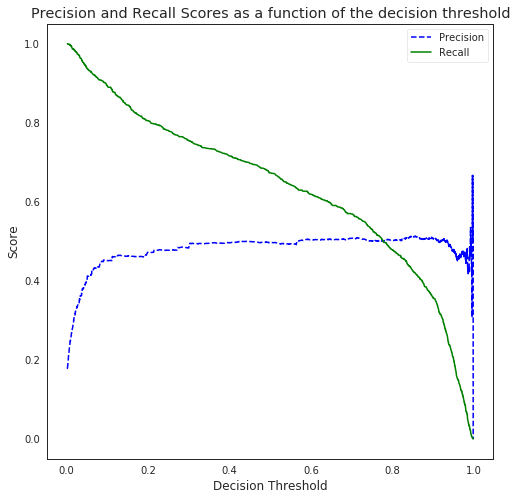

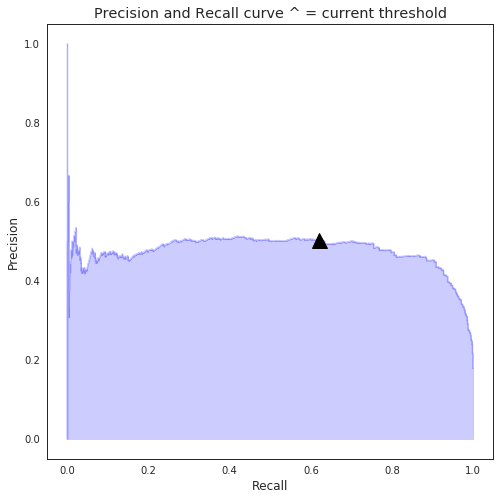

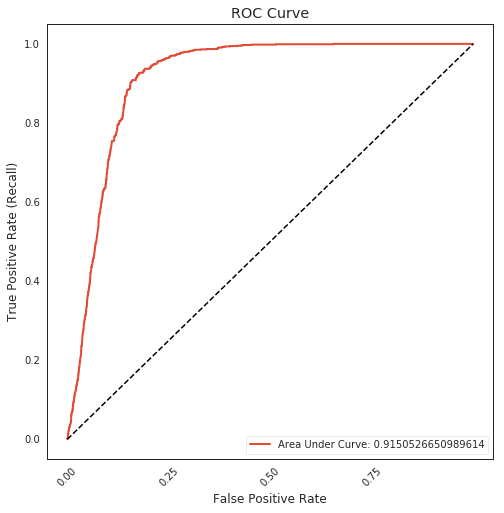

In [96]:
_, _, _, _ = metrics_fusion(nb, _, _, test_X, y_test, model_trained=True,
                            stats=True, precision_recall_stats=True, new_threshold=0.6)

### 5.2.2 XGBoost Classifier

#### Load Data

In [17]:
# TfidfVectorizer Maximum nuber of features

max_features = 3000

# tf-idf vectorizer for sentence/topic/document modelling

tvec = TfidfVectorizer(max_features=max_features, ngram_range=(1, 3), max_df=0.65,
                       tokenizer=nltk.word_tokenize,
                       strip_accents='unicode',
                       lowercase=True, analyzer='word',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('german'))

# Fit & Transform on train texts
# Only transform on val & test texts

train_X = tvec.fit_transform(x_train).toarray()
valid_X = tvec.transform(x_val).toarray()
test_X = tvec.transform(x_test).toarray()

train_y = y_train
valid_y = y_val
test_y = y_test

#### Append train & valid set data for Cross Validation

In [18]:
# Prepare training data

train_val_tf = np.append(train_X, valid_X, axis=0)
label_val_tf = np.append(train_y, valid_y, axis=0)

#### 5.2.2.1 Cross Validation

Now we will use `cross validation` method with 5 n_splits for averaging the scores and plot different `learning curves` against number of samples.

In [ ]:
# Cross validation class instance initialization, validation using 5 splits on XGB classifier

cv = cross_validation(xgb, train_val_tf, label_val_tf, n_splits=5,
                      init_chunk_size=5000, chunk_spacings=1000, average="binary")
cv.validate_for_holdout_set(test_X, y_test)

# Plot different scores
cv.plot_learning_curve()

#### 5.2.1.2 HyperOpt Optimization

Now we will find the `best alpha` parameter for `Naive Bayes`. Hence let's visualize the `universe` to be `explored` during HyperOpt optimization.

##### Space Visualization

In [19]:
# Parameter's space

hyper_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 1)),
    'eta': hp.quniform('eta', 0.025, 0.25, 0.025),
    'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.quniform('subsample', 0.7, 1, 0.05)
}

print('Sampling space example\n')
pprint.pprint(sample(hyper_space))

Sampling space example

{'eta': 0.25,
 'max_depth': 22,
 'min_child_weight': 4.0,
 'n_estimators': 253,
 'subsample': 0.8500000000000001}


##### Universe

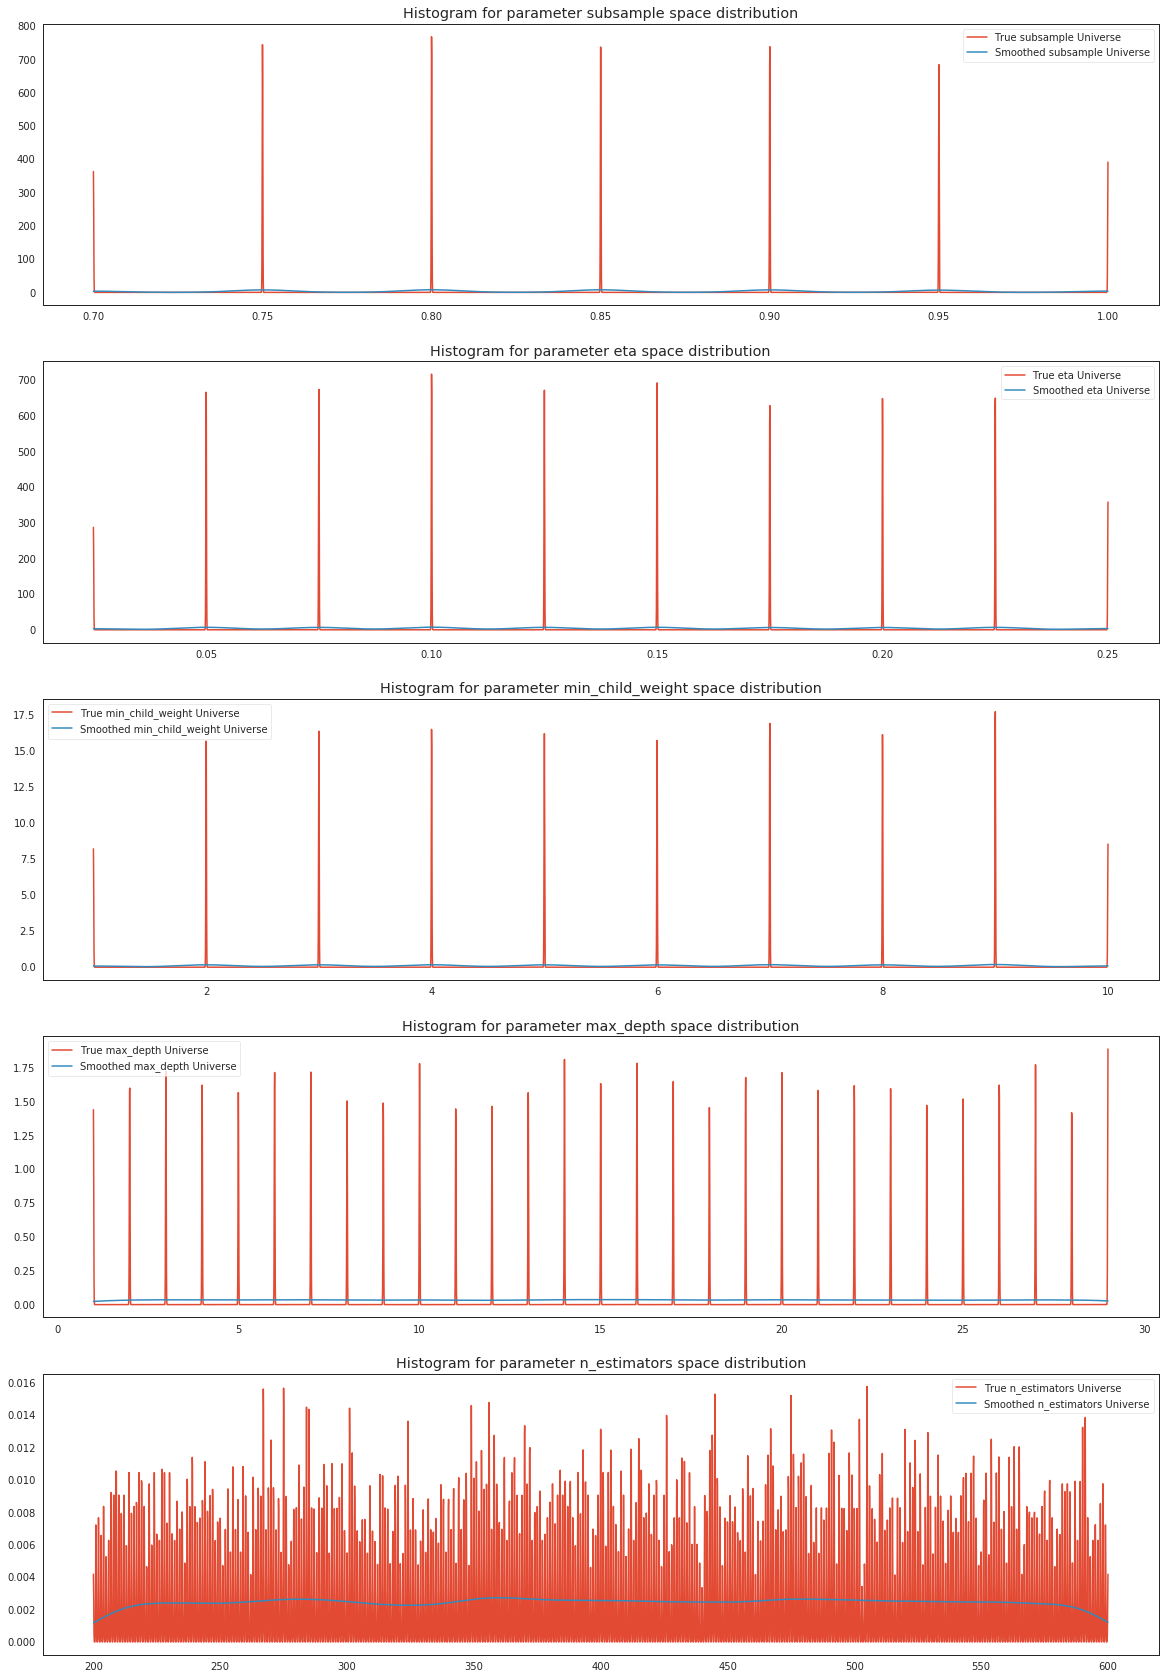

In [20]:
# Plot different parameter's space distribution after sampling for n_samples

n_samples = 5000
universe = {}

fig, axes = plt.subplots(nrows=len(hyper_space.keys()),
                         ncols=1, figsize=(20, 30))
cmap = plt.cm.jet

# Iterating over different trials & parameters
for index, (param, param_space) in enumerate(hyper_space.items()):

    # Sampling for n_samples
    universe[param] = [pyll.stochastic.sample(
        hyper_space[param]) for _ in range(n_samples)]
    param_domain = np.linspace(
        min(universe[param]), max(universe[param]), n_samples)

    # KDE calculation
    hist = gaussian_kde(universe[param], 0.001)
    axes[index].plot(param_domain, hist(param_domain),
                     label='True {} Universe'.format(param))

    blurred_hist = gaussian_kde(universe[param], 0.1)
    axes[index].plot(param_domain, blurred_hist(param_domain),
                     label='Smoothed {} Universe'.format(param))

    axes[index].set_title(
        'Histogram for parameter {} space distribution'.format(param))
    axes[index].legend()

plt.show()

**Tree Parzen Estimator (algorithm = tpe.suggest)**

* AUC as an evaluation metric

In [ ]:
iterations = 10
random_state = 21
cores = -1
best = 0

# Define the XGB  function as the objective


def objective(space):

    global best

    train_X_ = train_X
    valid_X_ = valid_X
    test_X_ = test_X

    # Normalizing or scaling the data
    if 'normalize' in space:
        if space['normalize'] == 1:
            train_X_ = normalize(train_X_)
            valid_X_ = normalize(valid_X_)
            test_X_ = normalize(test_X_)
            del space['normalize']

    if 'scale' in space:
        if space['scale'] == 1:
            train_X_ = scale(train_X_)
            valid_X_ = scale(valid_X_)
            test_X_ = scale(test_X_)
            del space['scale']

    eval_set = [(train_X, train_y), (valid_X, valid_y)]

    clf = XGBClassifier(n_estimators=space['n_estimators'],
                        learning_rate=space['eta'],
                        max_depth=space['max_depth'],
                        min_child_weight=space['min_child_weight'],
                        subsample=space['subsample'],
                        n_jobs=-1
                        )

    clf.fit(train_X, train_y,
            eval_set=eval_set, eval_metric="auc",
            # early_stopping_rounds=100,
            verbose=False)

    # evaluate predictions
    # predictions_prob = clf.predict_proba(test_X, ntree_limit=clf.best_iteration + 1)[:,1]
    predictions_prob = clf.predict_proba(test_X)[:, 1]
    auc = roc_auc_score(test_y, predictions_prob)

    if auc > best:
        best = auc
        print('\nBest AUC score: {}'.format(np.round(best*100, 2)))
        print('Space Parameters\n')
        pprint.pprint(space)

    return {'loss': 1-auc, 'status': STATUS_OK}


space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 10, 600, 50)),
    'eta': hp.quniform('eta', 0.025, 0.25, 0.025),
    'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}


print('Sampling space example\n')
pprint.pprint(sample(space))

# Trials keeps track of all experiments; These can be saved and loaded back into a new batch of experiments
tpe_auc_trials = Trials()

# The algorithm tpe.suggest runs the Tree-structured Parzen estimator
best_tpe_auc = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=iterations,
                    trials=tpe_auc_trials)

print('\n\nThe best parameteres discovered through HyperOpt tpe.suggest algorithm using AUC as an evaluation metric\n\n', best_tpe_auc)

Sampling space example

{'eta': 0.15000000000000002,
 'max_depth': 7,
 'min_child_weight': 4.0,
 'n_estimators': 600,
 'normalize': 1,
 'scale': 0,
 'subsample': 0.9}

Best AUC score: 90.43
Space Parameters

{'eta': 0.125,
 'max_depth': 18,
 'min_child_weight': 9.0,
 'n_estimators': 600,
 'normalize': 0,
 'scale': 0,
 'subsample': 0.8}

Best AUC score: 90.51
Space Parameters

{'eta': 0.05,
 'max_depth': 10,
 'min_child_weight': 1.0,
 'n_estimators': 200,
 'normalize': 0,
 'scale': 0,
 'subsample': 0.75}


#### Run the XGB classifier

Let's run a XGB classifier again with the `best parameters` found after HyperOpt optimization.

In [20]:
# Train an XGB classifier

params = {'eta': 0.05,
          'max_depth': 10,
          'min_child_weight': 1.0,
          'n_estimators': 200,
          'normalize': 0,
          'scale': 0,
          'subsample': 0.75}

xgb = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic',
                    random_state=21, seed=21, silent=True)
xgb.fit(train_val_tf, label_val_tf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1.0, missing=None,
       n_estimators=200, n_jobs=-1, normalize=0, nthread=None,
       objective='binary:logistic', random_state=21, reg_alpha=0,
       reg_lambda=1, scale=0, scale_pos_weight=1, seed=21, silent=True,
       subsample=0.75)

In [26]:
# Predict & evaluate metrics

y_pred = xgb.predict(test_X)

print('XGBoost Scores\n')
print("F1 score {:.4}%".format(f1_score(y_test, y_pred, average='macro')*100))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test, y_pred)*100))

XGBoost Scores

F1 score 61.41%
Accuracy score 84.19%


#### Evaluation

We can vary the threshold to select a different decision boundary to tune the model depending upon the goal. It's called Trade-Off between Precision & Recall.


Accuracy score: 84.19%
Overall Train and Prediction time: 0.33s
-----------------------------------------------------------------------------------------


Confusion matrix of the Fake News test set




,fake,true
fake,6956,604
true,762,318




Saving Confusion Matrices in the ./save/con_matrix directory


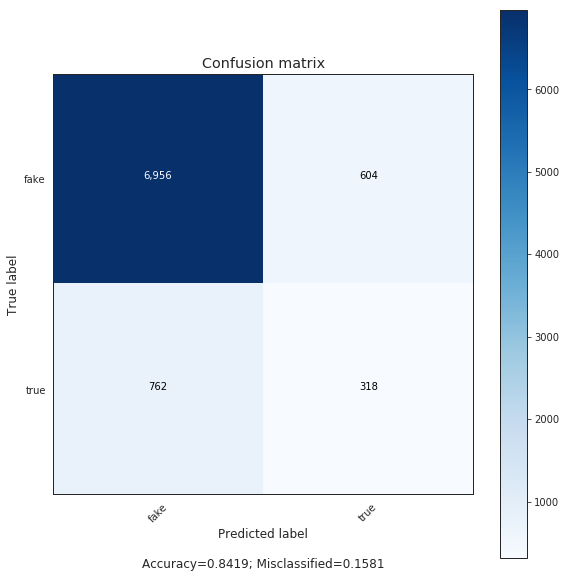


Classification Report

             precision    recall  f1-score   support

       fake       0.90      0.92      0.91      7560
       true       0.34      0.29      0.32      1080

avg / total       0.83      0.84      0.84      8640


 Plotting precision_recall curve against a given threshold of 0.55


Adjusted Threshold Confusion Matrix

      pred_neg  pred_pos
neg      7043       517
pos       808       272 




Adjusted Threshold F1 Score:  [0.91402245 0.29106474]


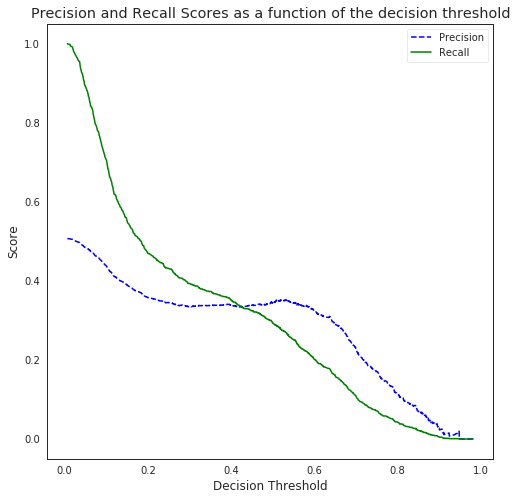

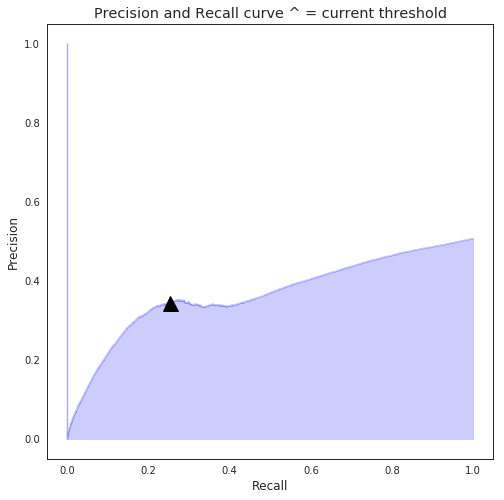

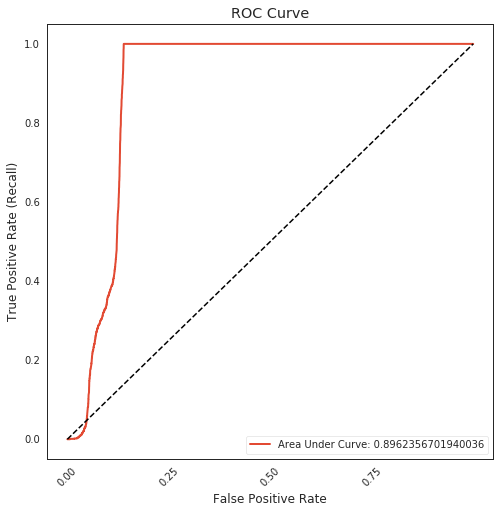

In [36]:
_, _, _, _ = metrics_fusion(xgb, _, _, test_X, y_test, model_trained=True,
                            stats=True, precision_recall_stats=True, new_threshold=0.55)

## 5.3 Ensemble models

Let's run an `ensemble` of the `best models` found during classifier comparison.


Validation result for Ensemble classifiers
VotingClassifier(estimators=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_e...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)
Baseline accuracy: 87.78%
Accuracy score: 83.89%
Model accuracy:83.89% - Baseline accuracy:87.78%: Decrease of -3.89%
Overall Train and Prediction time: 1537.15s
-----------------------------------------------------------------------------------------


Confusion matrix of the Seedlings Valid set




,fake,true
fake,145,13
true,16,6




Saving Confusion Matrices in the ./save/con_matrix directory


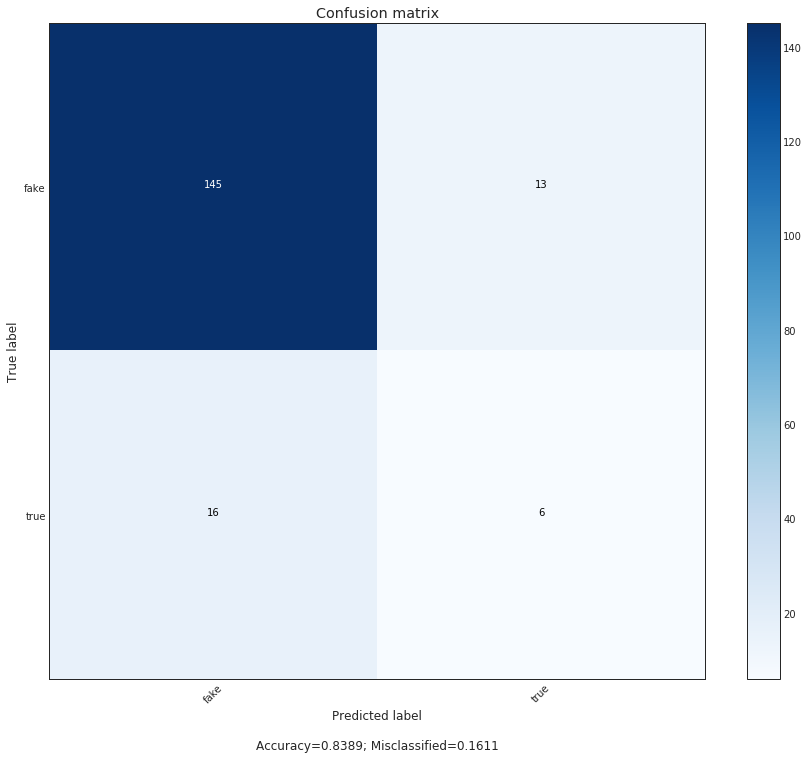


Classification Report

             precision    recall  f1-score   support

       fake       0.90      0.92      0.91       158
       true       0.32      0.27      0.29        22

avg / total       0.83      0.84      0.83       180



ValueError: too many values to unpack (expected 2)

In [18]:
% % time

# 9 Ensemble models

clf1 = SVC(probability=True)
clf2 = AdaBoostClassifier()
clf3 = MultinomialNB()
clf4 = XGBClassifier()
clf5 = GradientBoostingClassifier()
clf6 = MLPClassifier()
clf7 = KNeighborsClassifier(3)
clf8 = DecisionTreeClassifier()
clf9 = RandomForestClassifier()

eclf = VotingClassifier(estimators=[('svc', clf1), ('ada', clf2), ('mnb', clf3),
                                    ('xgb', clf4), ('gb', clf5), ('mlp', clf6),
                                    ('knn', clf7), ('dt', clf8), ('rf', clf9)], voting='hard')

# for clf_name, clf in zip(["SVM", "AdaBoost", "Naive Bayes",
#                           "XGB Classifier", "GradientBoost", "Neural Net",
#                           "Nearest Neighbors", "Decision Tree", "Random Forest", 'Ensemble'],
#                          [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, eclf]):

for clf_name, clf in zip(['Ensemble'], [eclf]):
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=30000,
                                       stop_words=stopwords.words('german'), ngram_range=(1, 3))),
        ('classifier', clf)
    ])
    print("\nValidation result for {} classifiers".format(clf_name))
    print(clf)

    # Calculate accuracy & summmary
    clf_accuracy, clf_time, _, _ = metrics_fusion(
        pipeline, x_train, y_train, x_val, y_val, stats=True)

## 5.4 Neural Networks

After experimenting with classical models, it would be interesting to evaluate the result of neural network classifier. The classical model can be thought as a basic neural network with no hidden layer and just one output node.

One can tune the hyperparameters using different combinations of Input, Hidden & Output layers, no of epochs etc.

### Helper Functions

#### Shuffling

By presenting data in the same order during each epoch, there's a possibility that the model learns the parameters which also include noise of the training data. It might eventually lead to overfitting. It can be mitigated by shuffling the order of the data fed to the model.

`Batch Generator with Shuffling`

In [264]:
# Batch generator updated


def batch_generator_shuffle(train, label, batch_size):

    # Calculate no of batches
    number_of_batches = train.shape[0]/batch_size

    # Data set indices to choose a batch from
    batch = np.arange(tf_train.shape[0])
    # Shuffling batch indices
    np.random.shuffle(batch)

    # Starting batch index
    batch_idx = 0
    while True:
        # Selecting batches
        train_batch = train[batch[batch_size *
                                  batch_idx:batch_size*(batch_idx+1)], :].toarray()
        label_batch = label[batch[batch_size *
                                  batch_idx:batch_size*(batch_idx+1)]]

        #print('\n{} Batch indices from {} to {} selected.\n'.format((batch_idx+1), (batch_size*batch_idx), (batch_size*(batch_idx+1))))

        # Generator statement
        yield train_batch, label_batch

        # Next batch
        batch_idx += 1
        # Check if 1 epoch is finished then next batch index should be greater than no of batches
        if (batch_idx > number_of_batches):
            np.random.shuffle(batch)
            batch_idx = 0

#### Implementing Precision, Recall, F1 & ROC Score using Custom Callbacks

We can monitor Precision, Recall, F1 & ROC Score using Custom Callbacks in two ways as follow.

**1. Monitor Metrics Using Callback**

In [26]:
# PrefrocCallback class implementing Callbacks


class PrefrocCallback(Callback):

    def __init__(self, training_data, validation_data):

        # Train & Validation data

        self.x_train = training_data[0]
        self.y_train = training_data[1]

        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):

        # List to store Precison, Recall, F1 & ROC scores

        self.train_f1s = []
        self.train_recalls = []
        self.train_precisions = []
        self.train_rocs = []

        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
        self.val_rocs = []

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):

        # Train set scores

        # Predicton, Target
        train_predict = (np.asarray(self.model.predict(self.x_train))).round()
        train_targ = self.y_train

        # Precison, Recall, F1 & ROC Score
        _train_f1 = f1_score(train_targ, train_predict)
        _train_recall = recall_score(train_targ, train_predict)
        _train_precision = precision_score(train_targ, train_predict)
        _train_roc = roc_auc_score(train_targ, train_predict)

        logs['train_f1'] = _train_f1
        logs['train_recall'] = _train_recall
        logs['train_precision'] = _train_precision
        logs['train_roc'] = _train_roc

        self.train_f1s.append(_train_f1)
        self.train_recalls.append(_train_recall)
        self.train_precisions.append(_train_precision)
        self.train_rocs.append(_train_roc)

        # Validation set scores

        # Predicton, Target
        val_predict = (np.asarray(self.model.predict(self.x_val))).round()
        val_targ = self.y_val

        # Precison, Recall, F1 & ROC Score
        _val_f1 = f1_score(val_targ, val_predict, average='weighted')
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        _val_roc = roc_auc_score(val_targ, val_predict)

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        logs['val_roc'] = _val_roc

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        self.val_rocs.append(_val_roc)

        # Display all the metrics
        print('\ntrain_precision: {:.4f} train_recall: {:.4f} train_f1: {:.4f} train_roc: {:.4f}'.format(
            _train_f1, _train_precision, _train_recall, _train_roc))
        print('val_precision: {:.4f} val_recall: {:.4f} val_f1: {:.4f} val_roc: {:.4f}\n'.format(
            _val_f1, _val_precision, _val_recall, _val_roc))

        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

**2. Monitor Metrics using Custom Functions**

In [25]:
# Checking labels, predictions shape


def check_units(y_true, y_pred):

    if (y_pred.shape[1] != 1):
        y_pred = y_pred[:, 1:2]
        y_true = y_true[:, 1:2]

    return y_true, y_pred


# Calculate Precision

def precision(y_true, y_pred):

    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    return precision


# Calculate Recall

def recall(y_true, y_pred):

    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return recall


# Calculate F1 Score

def f1(y_true, y_pred):

    # Calculate Recall

    def recall(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())

        return recall

    # Calculate Precision

    def precision(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())

        return precision

    y_true, y_pred = check_units(y_true, y_pred)
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 5.4.1 Basic LSTM

`LSTMs` using `TF-IDF` input vectors with `Dense` network.

#### Load Data

In [16]:
%time

# Splitting data into train, test & validation sets

x_train, x_val_test, y_train, y_val_test = train_test_split(
    train, label_encoded, test_size=.4, stratify=label_encoded, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)


# tf-idf vectorizer for sentence/topic/document modelling

tvec = TfidfVectorizer(max_features=max_features, ngram_range=(1, 3), max_df=0.65,
                       tokenizer=nltk.word_tokenize,
                       strip_accents='unicode',
                       lowercase=True, analyzer='word', token_pattern=r'\w+',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('german'))


# Fit & Transform on train texts
# Only transform on val & test texts

x_train_tf = tvec.fit_transform(x_train).toarray()
x_val_tf = tvec.transform(x_val).toarray()
x_test_tf = tvec.transform(x_test).toarray()

# Dumping tokenizer using joblib which is faster than pickle

print('\nDumping News TfidfVectorizer as tvec-dense ...')
joblib.dump(tvec, os.path.join('./save/pickle', 'tvec-dense.pickle'))


# Printing the shape of different text corpus

print('\nx_train_tf shape: ', x_train_tf.shape)
print('x_val_tf: ', x_val_tf.shape)
print('x_test_tf: ', x_test_tf.shape)

# Reshape data to [samples, time steps, features] shape

print(
    '\nReshaping data to the shape [samples, time steps, features] for LSTMs ...')
x_train_tf_lstm = np.reshape(
    x_train_tf, (x_train_tf.shape[0], 1, x_train_tf.shape[1]))
x_val_tf_lstm = np.reshape(x_val_tf, (x_val_tf.shape[0], 1, x_val_tf.shape[1]))
x_test_tf_lstm = np.reshape(
    x_test_tf, (x_test_tf.shape[0], 1, x_test_tf.shape[1]))
print('\nReshaping done ...')

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs

Dumping News TfidfVectorizer as tvec-dense ...

x_train_tf shape:  (10800, 3000)
x_val_tf:  (2880, 3000)
x_test_tf:  (4320, 3000)

Reshaping data to the shape [samples, time steps, features] for LSTMs ...

Reshaping done ...


#### Training

In [17]:
% % time

# Setting Checkpoint, Early Stopping, Precison, Recall, F1 & ROC Score callbacks

# The PrefrocCallback prints out metrices at the end of each epoch. It must be listed
# before the EarlyStopping callback, which monitors val_f1 values saved in the previous callback.

prefroc_callback = PrefrocCallback(training_data=(
    x_train_tf_lstm, y_train), validation_data=(x_val_tf_lstm, y_val))

early_stop = EarlyStopping(monitor='val_f1', patience=5, mode='max', verbose=1)

# checkpoint_path = './checkpoint/model_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpoint_path = './checkpoint/model_best_weights.{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_f1', verbose=1, save_best_only=True, mode='max')

csv_logger = CSVLogger(
    './logs/csv/model_best_weights.{epoch:02d}.log', separator=',', append=False)

tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=2000, write_graph=True, write_images=False)

callbacks_list = [checkpoint, early_stop,
                  prefroc_callback, csv_logger, tensorboard]


np.random.seed(seed)

# Create Model

model = Sequential()

model.add(LSTM(512, input_shape=(1, max_features),
               dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

# Compile Model

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model with shuffled data

# model.fit_generator(generator=batch_generator_shuffle(x_train_tf, y_train, batch_size),
#                     validation_data=(x_val_tf, y_val), epochs=50, steps_per_epoch=x_train_tf.shape[0]/batch_size,
#                     verbose=2, callbacks=callbacks_list, shuffle=True, initial_epoch=0,
#                     use_multiprocessing=True)

model.fit(x_train_tf_lstm, y_train, validation_data=(x_val_tf_lstm, y_val), batch_size=batch_size,
          epochs=epochs, verbose=2, callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512)               7194624   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
__________

In [27]:
model.history.history.keys()

dict_keys(['val_loss', 'val_f1', 'val_roc', 'val_precision', 'train_f1', 'val_acc', 'loss', 'val_recall', 'train_roc', 'acc', 'train_recall', 'train_precision'])

#### Evaluation

In [18]:
# Evaluation gives the result from the last trained model

model.evaluate(x=x_test_tf_lstm, y=y_test)

4320/4320 [==============================] - 0s 95us/step


[0.4310823523784401, 0.8574074074074074]

#### Confusion Matrix & F1 Score

LSTM basic cells Scores

F1 score 44.2%
Accuracy score 85.74%


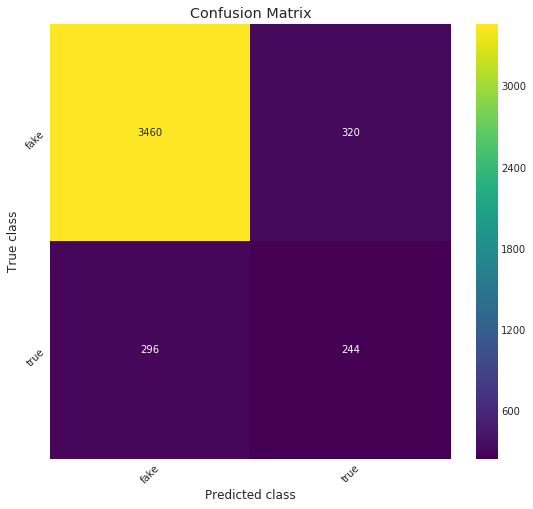

In [19]:
# Evaluation gives the result from the last trained model

y_pred = model.predict(x=x_test_tf_lstm)
y_pred = [np.round(value) for value in y_pred]

print('LSTM basic cells Scores\n')
print("F1 score {:.4}%".format(f1_score(y_test, y_pred)*100))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test, y_pred)*100))


con_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap

fig, ax = plt.subplots(1, figsize=(8, 8))

ax = sns.heatmap(con_matrix, ax=ax, cmap='viridis', annot=True, fmt='g')

ax.set_xticklabels(list(le.classes_), rotation=45)
ax.set_yticklabels(list(le.classes_), rotation=45)

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

fig.savefig(os.path.join('./save/con_matrix',
                         'FakeNews_LSTM_Confusion_Matrix.png'), dpi=300)
plt.show()

### 5.4.2 LSTM with Embeddings

LSTMs with `embeddings` learned from the `corpus of Fake News`.

#### Parameters

In [14]:
vocab_size = 300
maxlen = 300
batch_size = 32
embedding_type = 'embed_tokenizer'

seed = 21
np.random.seed(seed)

#### Load Data

In [15]:
%time

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    train, label_onehot, test_size=.4, stratify=label_encoded, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


#### Training

In [17]:
# Create the tokenizer & fit on all the url texts

tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(x_train)

# Dumping tokenizer using joblib which is faster than pickle
joblib.dump(tokenizer, os.path.join('./save/pickle',
                                    '{}/tokenizer.pickle'.format(embedding_type)))

# Generating sequences & padding for efficient training of our neural network
# Transforms each text in texts to a sequence of integers.
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded_sequences = sequence.pad_sequences(train_sequences, maxlen=maxlen)

val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded_sequences = sequence.pad_sequences(val_sequences, maxlen=maxlen)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded_sequences = sequence.pad_sequences(test_sequences, maxlen=maxlen)


# Initializing & running keras model

print('\n\n****************** Keras model training started. *******************\n\n')

# Setting checkpoint & early stopping
checkpoint_path = os.path.join(os.path.join('./checkpoint', embedding_type),
                               'model_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5')
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max')

# prefroc_callback = PrefrocCallback(training_data=(train_padded_sequences, y_train), validation_data=(val_padded_sequences, y_val))

tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=2000, write_graph=True, write_images=False)

callbacks_list = [checkpoint, tensorboard]

# Running the pipeline
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=maxlen))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1, precision, recall])

print(model.summary())

print('Training starts...')
model.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=50,
          validation_data=(val_padded_sequences, y_val),
          verbose=2, callbacks=callbacks_list)



****************** Keras model training started. *******************




Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          90000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
Total params: 811,802
Trainable params: 811,802
Non-trainable params: 0
_________________________________________________________________
None
Training starts...
Train on 10800 samples, validate on 2880 samples
Epoch 1/50
 - 184s - loss: 0.2634 - acc: 0.8742 - f1: 0.3109 - precision: 0.3749 - recall: 0.3143 - val_loss: 0.2465 - val_acc: 0.8781 - val_f1: 0.5221 - val_precision: 0.5075 - val_recall: 0.6179
Epoch 2/50
 - 121s - loss: 0.2005 - acc:

#### Evaluation

In [ ]:
# Evaluate the model

scores = model.evaluate(test_padded_sequences, y_test,
                        batch_size=batch_size)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

### 5.4.3 LSTM with pre-trained GloVe Embeddings

GloVe is another kind of word vector representaiton proposed by Pennington et al. (2014) from the Stanford NLP Group.

* https://nlp.stanford.edu/pubs/glove.pdf

The difference between Word2Vec and Glove is how the models compute the word vectors. In Word2Vec, the word vectors can be seen as a by-product of shallow neural network, when it tries to predict either centre word given surrounding words or vice versa.

GloVe word vectors are the object matrix of GloVe model which is calculated by using co-occurrence matrix and dimensionality reduction.

Now we will extract the Word vectors from pre-trained GloVe.

#### Parameters

In [43]:
vocab_size = 300
maxlen = 300
batch_size = 32
epochs = 10
embedding_type = 'glove_embed_tokenizer'

seed = 21
np.random.seed(seed)

#### Load Data

In [41]:
%time

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    train, label_onehot, test_size=.4, stratify=label_encoded, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


#### Prepare Embeddings

In [42]:
# Create the tokenizer & fit on all the url texts

tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(x_train)

# Dumping tokenizer using joblib which is faster than pickle
joblib.dump(tokenizer, os.path.join('./save/pickle',
                                    '{}/tokenizer.pickle'.format(embedding_type)))

# Generating sequences & padding for efficient training of our neural network
# Transforms each text in texts to a sequence of integers.
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded_sequences = sequence.pad_sequences(train_sequences, maxlen=maxlen)

val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded_sequences = sequence.pad_sequences(val_sequences, maxlen=maxlen)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded_sequences = sequence.pad_sequences(test_sequences, maxlen=maxlen)

del x_train, train_sequences, x_val, val_sequences, x_test, test_sequences


# Load Glove embeddings

print('Loading Glove word vectors ...')
embeddings_index = dict()

try:
    f = open('./data/glove.6B/glove.6B.300d.txt')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
except Exception as e:
    print('Stacktrace', e)
    print('Glove file does not exist.')
finally:
    f.close()

print('Loaded %s Glove word vectors.' % len(embeddings_index))


# Create a weight matrix for all the words

print('\nMapping words to Glove embeddings ...')
embedding_matrix = np.zeros((vocab_size, maxlen))

for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

print('Shape of Embedding Matrix: ', embedding_matrix.shape)
print('Glove Mapping done.')

Loading Glove word vectors ...
Loaded 400001 Glove word vectors.

Mapping words to Glove embeddings ...
Shape of Embedding Matrix:  (300, 300)
Glove Mapping done.


#### Training

In [26]:
# Initializing & running keras model

print('\n\n****************** Keras model training started. *******************\n\n')

# Setting checkpoint & early stopping
checkpoint_path = os.path.join(os.path.join('./checkpoint', embedding_type),
                               'model_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5')
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max')

# prefroc_callback = PrefrocCallback(training_data=(train_padded_sequences, y_train), validation_data=(val_padded_sequences, y_val))

tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=2000, write_graph=True, write_images=False)

callbacks_list = [checkpoint, tensorboard]

# Running the pipeline
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(maxlen, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1, precision, recall])

print(model.summary())

print('Training starts...')
model.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),
          verbose=2, callbacks=callbacks_list)



****************** Keras model training started. *******************




Build model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          90000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 602       
Total params: 811,802
Trainable params: 721,802
Non-trainable params: 90,000
_________________________________________________________________
None
Training starts...
Train on 10800 samples, validate on 2880 samples
Epoch 1/10
 - 114s - loss: 0.3910 - acc: 0.8750 - f1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3798 - val_acc: 0.8750 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

Epoch 000

#### Evaluation

In [27]:
# Evaluate the model

scores = model.evaluate(test_padded_sequences, y_test,
                        batch_size=batch_size)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

4320/4320 [==============================] - 14s 3ms/step
Loss: 0.37801963714537795
Accuracy: 0.875


### 5.4.4 LSTM with pre-trained FastText Embeddings

LSTMs with embeddings weights initialized using FastText German Embeddings

`FastText` is a library for efficient learning of word representations and sentence classification.

#### Parameters

In [27]:
vocab_size = 10000
embed_dim = 300
maxlen = 300
batch_size = 32
epochs = 50
embedding_type = 'fasttext'

seed = 21
np.random.seed(seed)

#### 5.4.4.1 Words Embedding Visualization using FastText

**Load FastText German Model**

In [30]:
# Loading the German model
de_model = KeyedVectors.load_word2vec_format('./data/wiki.de/wiki.de.vec')

# Getting the tokens
words = []
for word in de_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector
print("Dimension of a word vector: {}".format(len(de_model[words[0]])))

Number of Tokens: 2275233
Dimension of a word vector: 300


**Tokenize all the training data**

In [31]:
# The Tokenizer stores everything in the word_index during fit_on_texts. Then, when calling the
# texts_to_sequences method, only the top num_words are considered.

# Create the tokenizer & fit on all the news texts

tokenizer = Tokenizer(num_words=vocab_size, lower=True, char_level=False)
tokenizer.fit_on_texts(train)

# Generating sequences using texts_to_sequences which transforms each word to a corresponding integer.
train_sequences = tokenizer.texts_to_sequences(train)

# Generating sequences & padding for efficient training of our neural network
# Transforms each text in texts to a sequence of integers.
train_padded_sequences = sequence.pad_sequences(train_sequences, maxlen=maxlen)

# Printing the learnt summary about url texts
print('Tokenizer summary after learning on the url texts.')
print('Dictionary size: {}'.format(len(tokenizer.word_index)))
print('Documents Count: {}'.format(tokenizer.document_count))

Tokenizer summary after learning on the url texts.
Dictionary size: 96220
Documents Count: 36000


**Embed training corpus words using FastText German Embeddings**

In [32]:
# Create a weight matrix for all the words in training set

print('\nMapping training set tokenized words to FastText German embeddings ...')

# Getting tokens and vectors
words = []
words_not_found = []
embed_vocab_size = min(vocab_size, len(tokenizer.word_index))
embedding_matrix = np.zeros((embed_vocab_size, embed_dim))


for word, index in tokenizer.word_index.items():
    if index > embed_vocab_size - 1:
        continue
    try:
        embedding_vector = de_model[word]
        if (embedding_vector is not None) and len(embedding_vector) > 0:
            # Appending the vectors
            embedding_matrix[index] = embedding_vector
            # Appending the tokens
            words.append(word)
    except:
        # Appending the not found tokens
        words_not_found.append(word)

print('Shape of Embedding Matrix: ', embedding_matrix.shape)
print('FastText German Mapping done.')

print('\nNumber of word embeddings with zeros only: %d' %
      np.sum(np.sum(embedding_matrix, axis=1) == 0))

print('\nWords found Samples: ', np.random.choice(words, 20))
print('\nWords not found Samples: ', np.random.choice(words_not_found, 20))


Mapping training set tokenized words to FastText German embeddings ...
Shape of Embedding Matrix:  (10000, 300)
FastText German Mapping done.

Number of word embeddings with zeros only: 2990

Words found Samples:  ['beeinfluss' 'verantwort' 'eiskunstlauf' 'innsbruck' 'gelass' 'mitt'
 'ntb' 'pfefferspray' 'richard' 'moglich' 'werbung' 'act' 'blick'
 'machterhalt' 'kunst' 'allmacht' 'wulstig' 'zugleich' 'geballt' 'spar']

Words not found Samples:  ['fehlubersetz' 'vorgeschlag' 'realitatsfremd' 'mittelme'
 'religionsbehord' 'geschaftsfuhr' 'drittfrau' 'nachrichtensend'
 'betonwust' 'installi' 'augenzeug' 'unschuldsvermut' 'vernachlassigt'
 'gestieg' 'kryptowahr' 'untyp' 'brexitvotum' 'medienkartell' 'mutterti'
 'eroffnet']


**Visualize using t-SNE**

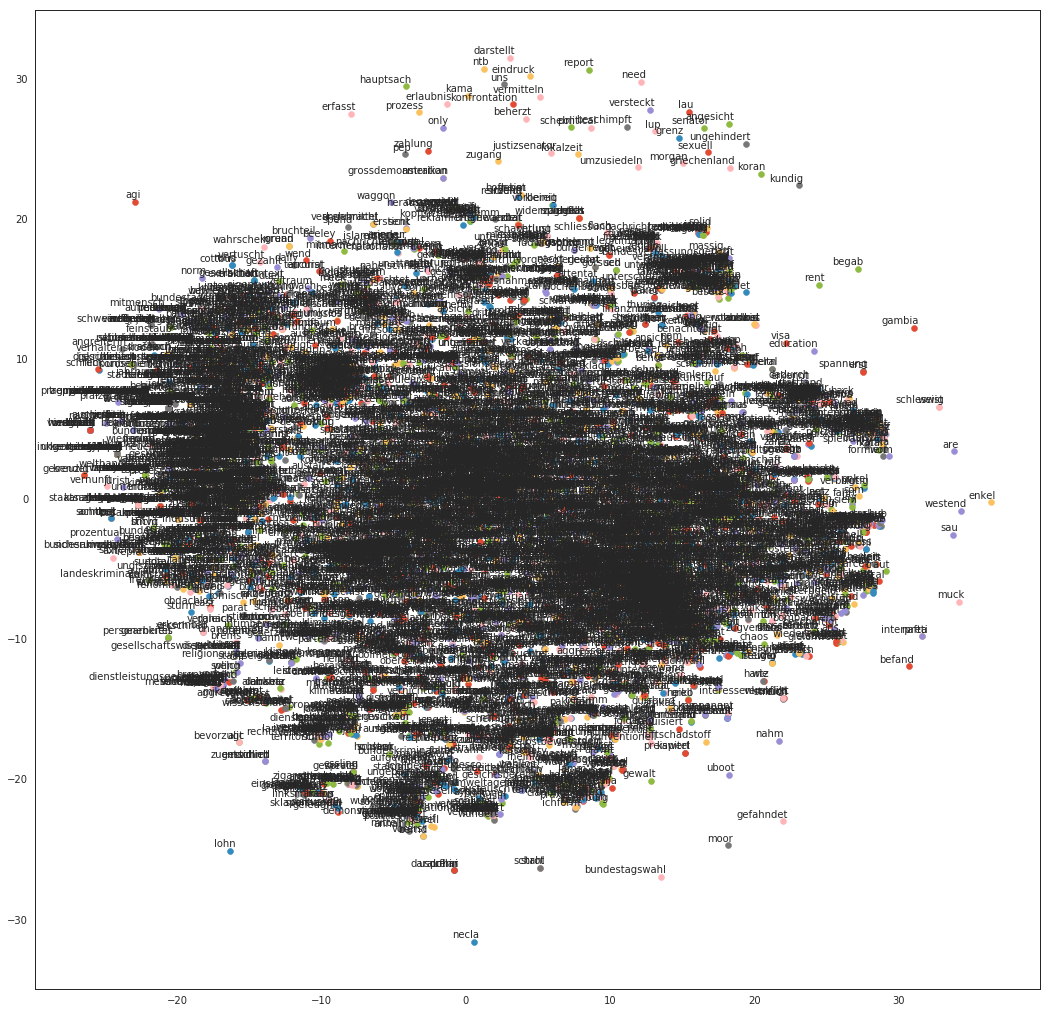

In [26]:
# Creating the tsne plot

tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=500)
low_dim_embedding = tsne.fit_transform(embedding_matrix)

# Finally plotting and saving the fig
plot_with_labels(low_dim_embedding, words)

#### 5.4.4.2 Load Data

In [34]:
%time

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    train_padded_sequences, label_encoded, test_size=.4, stratify=label_encoded, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [24]:
del train_padded_sequences, x_val_test, y_val_test

#### 5.4.4.3 Training

In [26]:
# Initializing & running keras model

print('\n\n****************** Keras model training started. *******************\n\n')


# Setting Checkpoint, Early Stopping, Precison, Recall, F1 & ROC Score callbacks

# The PrefrocCallback prints out metrices at the end of each epoch. It must be listed
# before the EarlyStopping callback, which monitors val_f1 values saved in the previous callback.

prefroc_callback = PrefrocCallback(training_data=(
    x_train, y_train), validation_data=(x_val, y_val))

early_stop = EarlyStopping(
    monitor='val_f1', patience=10, mode='max', verbose=1)

# checkpoint_path = './checkpoint/model_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpoint_path = './checkpoint/FastText_model_best_weights.{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='val_f1', verbose=1, save_best_only=True, mode='max')

csv_logger = CSVLogger(
    './logs/csv/FastText_model_best_weights-epochs.log', separator=',', append=False)

tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=2000, write_graph=True, write_images=False)

callbacks_list = [checkpoint, early_stop,
                  prefroc_callback, csv_logger, tensorboard]


# Running the pipeline
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model = Sequential()
model.add(Embedding(embed_vocab_size, 300, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1, precision, recall])

print(model.summary())

print('Training starts...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          verbose=2, callbacks=callbacks_list)



****************** Keras model training started. *******************




Build model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 3,721,501
Trainable params: 721,501
Non-trainable params: 3,000,000
_________________________________________________________________
None
Training starts...
Train on 21600 samples, validate on 5760 samples
Epoch 1/50
 - 453s - loss: 0.3210 - acc: 0.8724 - f1: 0.1200 - precision: 0.2043 - recall: 0.0979 - val_loss: 0.5037 - val_acc: 0.8748 - val_f1: 0.0272 - val_precision: 0.0528 - val_recall: 0.0191

Epoch 00001: val_f1 improved

#### 5.4.4.4 Save the model & weights

##### Save the embedding weights to the disk

In [23]:
# The first (Embedding) layer stores the learnt embedding weights.

embed_weights = model.layers[0].get_weights()[0]

# Dump the embedding weights

joblib.dump(embed_weights, os.path.join('./save/embed_weights.h5'))

['./save/embed_weights.h5']

##### Save Model & Weights to the disk

In [22]:
# Serialize model to JSON

model_json = model.to_json()
with open("./save/model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5

model.save_weights("./save/best_model_weights.h5")
print("Saved model to disk")

Saved model to disk


#### 5.4.4.5 Evaluation

##### Load Model & Weights

In [20]:
# load json and create model

json_file = open('./save/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model

# loaded_model.load_weights("./save/best_model_weights.h5")
loaded_model.load_weights("./checkpoint/FastText_model_best_weights.02.hdf5")
print("Loaded model from disk")

Loaded model from disk


##### Compile the model for evaluation

In [68]:
# try using different optimizers and different optimizer configs

loaded_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy', f1, precision, recall])

print(loaded_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 3,721,501
Trainable params: 721,501
Non-trainable params: 3,000,000
_________________________________________________________________
None


**Evaluate**

In [44]:
# Evaluate the model

scores = loaded_model.evaluate(x_test, y_test, batch_size=batch_size)

print('\nLoss:', scores[0])
print('Accuracy:', scores[1])
print('F1:', scores[2])
print('Precision:', scores[3])
print('Recall:', scores[4])

8640/8640 [==============================] - 97s 11ms/step

Loss: 0.21778625596176696
Accuracy: 0.8700231481481482
F1: 0.4657139826703955
Precision: 0.49599113039396425
Recall: 0.502353298332956


**Metrices**


Accuracy score: 87.00%
Overall Train and Prediction time: 92.74s
-----------------------------------------------------------------------------------------


Confusion matrix of the Fake News test set




,fake,true
fake,6966,594
true,529,551




Saving Confusion Matrices in the ./save/con_matrix directory


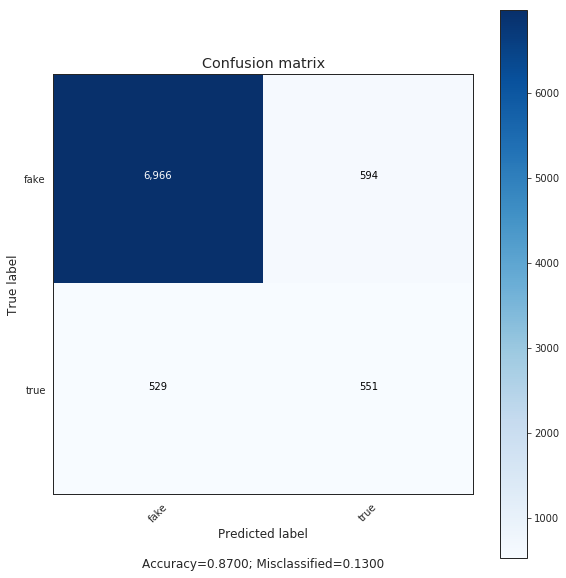


Classification Report

             precision    recall  f1-score   support

       fake       0.93      0.92      0.93      7560
       true       0.48      0.51      0.50      1080

avg / total       0.87      0.87      0.87      8640



In [43]:
_, _, _, _ = metrics_fusion(loaded_model, x_train, y_train, x_test, y_test,
                            model_trained=True, stats=True, precision_recall_stats=False, new_threshold=0.5)

### 5.4.5 Visualize learned Embedding weights

Let's visualize the `learnt embedding weights` of the above `FastText LSTM` model.

#### Helper Function

In [45]:
# Interactive plot using Plotly


def plotly_embeddings(data, words, start, stop, step):

    # Scatter plotting

    trace = go.Scatter(x=data[start:stop:step, 0], y=data[start:stop:step, 1], mode='markers',
                       text=words[start:stop:step])

    # Layout dictionary

    layout = dict(title='t-SNE 1D vs t-SNE 2D',  xaxis=dict(title='t-SNE 1'), yaxis=dict(title='t-SNE 2D'),
                  hovermode='closest')

    # Plot the scattered data & layout

    fig = dict(data=[trace], layout=layout)

    # Interactive plot using plotly

    py.iplot(fig)

#### Load the embedding weights from the disk

In [46]:
# Dump the embedding weights

embed_weights = joblib.load(os.path.join('./save/embed_weights.h5'))

#### t-SNE 

In [47]:
# Creating the tsne plot

tsne = TSNE(n_components=2)
fast_lstm_embedding = tsne.fit_transform(embed_weights)

# Finally plotting the fig

plotly_embeddings(fast_lstm_embedding, list)words_not_found + words), start=0, stop=2000, step=1)

# 6. Conclusion

After running a lot of different experiments, I have found `Naive Bayes` performance is `better` than others. LSTMs with pre-trained FastText Embeddings also performs good but it's time & compute intensive.

LSTMs with `embeddings learnt from scratch` with `proper weight initialization` & configuration might `outperform` all of them if tuned properly.

It's just `an empirical observation` based upon `a particular FakeNews dataset` and other model configurations.

`Advatages` of `Naive Bayes` over LSTMs with pre-trained FastText Embeddings (or other neural network models)

1. Less time complexity
2. Low resource requirements
3. Less inference time as compared to neural models

Finally, I will populate a table with the best performing models and different metrices below.

## Metrices Table

| Model                                    | Accuracy | F1 | Precision | Recall |
|:----------------------------------------:|:--------:|:--:|:---------:|:------:|
| Naive Bayes                              | 87       | 88 | 89        | 87     |
| XGB                                      | 84       | 84 | 83        | 84     |
| LSTM with pre-trained FastText Embeddings| 87       | 87 | 87        | 87     |

**Note: All Average scores are in percentage (%).**

# 7. Further Improvements

There are `thousands of ways` to improve the performance of model and I'm documenting few of them below for further improvement.

1. Try to use the creative data preprocessing steps, promising models, ensemble of them, different algorithms and compare their result
    * Experiment with stacking different input features in different ways (combinations) to understand their impact on the accuracy
    * Do this by optimizing hyperparameters
2. Try adding new features after sanitizing data with **proper Regular Expression** statements and filtering text specific to our task of FakeNews Detection.
3. It would be interesting to initialize embedding weights using **SpaCy German Embedding** and finetune the model.
4. Use **CNN**, **ConvLSTM** or other promising models and evaluate exhaustively.